# Part I - (Airline On-Time Performance Data)
## by (Ayoub Elkhaddouri)

## Introduction
    Cet ensemble de données rapporte les vols aux États-Unis, y compris les transporteurs, les retards d'arrivée et de départ et les raisons des retards, de 1987 à 2008.

### description des colonnes

- Year,1987-2008
- Month,12-Jan
- DayofMonth,31-Jan
- DayOfWeek,1 (Monday) - 7 (Sunday)
- DepTime,"actual departure time (local, hhmm)"
- CRSDepTime,"scheduled departure time (local, hhmm)"
- ArrTime,"actual arrival time (local, hhmm)"
- CRSArrTime,"scheduled arrival time (local, hhmm)"
- UniqueCarrier,unique carrier code
- FlightNum,flight number
- TailNum,plane tail number
- ActualElapsedTime,in minutes
- CRSElapsedTime,in minutes
- AirTime,in minutes
- ArrDelay,"arrival delay, in minutes"
- DepDelay,"departure delay, in minutes"
- Origin,origin IATA airport code
- Dest,destination IATA airport code
- Distance,in miles
- TaxiIn,"taxi in time, in minutes"
- TaxiOut,taxi out time in minutes
- Cancelled,was the flight cancelled?
- CancellationCode,"reason for cancellation (A = carrier, B = weather, C = NAS(National Aviation System), D = security)"
- Diverted,"1 = yes, 0 = no"
- CarrierDelay,in minutes
- WeatherDelay,in minutes
- NASDelay,in minutes
- SecurityDelay,in minutes
- LateAircraftDelay,in minutes





## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
%matplotlib inline
plt.rcParams.update({'font.size': 20})

> je vais analyser les donnees "Flights (Airline On-Time Performance Data)", j ai selectionner l'anne 2008 

In [3]:
df = pd.read_csv('data/2008.csv')

In [4]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
df.shape

(2389217, 29)

In [6]:
df.sample(4)

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
608103   2008      2           3          7   1824.0        1605   1950.0   
2039714  2008      4          15          2    550.0         602    719.0   
308156   2008      1          19          6    942.0         940   1132.0   
488859   2008      1           1          2     45.0          25    547.0   

         CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
608103         1725            WN       3411  N655WN               86.0   
2039714         732            UA       1505  N491UA               89.0   
308156         1140            DL       1580  N373DA              110.0   
488859          535            AA        622  N4XSAA              182.0   

         CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  \
608103             80.0     70.0     145.0     139.0    PDX  RNO       444   
2039714            90.0     73.0     -13.0     -12.0    LAS  SFO       414   
308156            120.0     82.0      -8.0       2.0    MIA  ATL       595   
488859            190.0    165.0      12.0      20.0    SMF  DFW      1431   

         TaxiIn  TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  \
608103      3.0     13.0          0              NaN         0           0.0   
2039714     5.0     11.0          0              NaN         0           NaN   
308156      9.0     19.0          0              NaN         0           NaN   
488859      5.0     12.0          0              NaN         0           NaN   

         WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
608103            0.0       6.0            0.0              139.0  
2039714           NaN       NaN            NaN                NaN  
308156            NaN       NaN            NaN                NaN  
488859            NaN       NaN            NaN                NaN

In [7]:
# le pourcetage de valeurs manquantes dans chaque colonne
(df.isnull().sum() * 100) / df.shape[0]

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               2.697202
CRSDepTime            0.000000
ArrTime               2.933848
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               1.776816
ActualElapsedTime     2.933848
CRSElapsedTime        0.017035
AirTime               2.933848
ArrDelay              2.933848
DepDelay              2.697202
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                2.933848
TaxiOut               2.697202
Cancelled             0.000000
CancellationCode     97.302798
Diverted              0.000000
CarrierDelay         75.532444
WeatherDelay         75.532444
NASDelay             75.532444
SecurityDelay        75.532444
LateAircraftDelay    75.532444
dtype: float64

In [8]:
df.duplicated().sum()

4

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

#### Les correctifs
- Je vais changer le type de la colonne Cancelled, Diverted (int) -> (bool)
- je vais changer le type de la colonne FlightNum en chaîne
- Je vais supprimer la colonne Year car j'ai juste les données de l'année 2008 et les deux colonnes DepTime, ArrTime car j'ai les colonnes CRS
- Je vais supprimer les données en double

In [10]:
df_clean = df.copy()

In [11]:
df_clean['Cancelled'] = df_clean.Cancelled.astype('bool')
df_clean['Diverted'] = df_clean.Cancelled.astype('bool')

In [12]:
df_clean.drop(['DepTime', 'ArrTime', 'Year'], axis=1, inplace=True)

In [13]:
df_clean.drop_duplicates(inplace=True)

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389213 entries, 0 to 2389216
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   CRSDepTime         int64  
 4   CRSArrTime         int64  
 5   UniqueCarrier      object 
 6   FlightNum          int64  
 7   TailNum            object 
 8   ActualElapsedTime  float64
 9   CRSElapsedTime     float64
 10  AirTime            float64
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Origin             object 
 14  Dest               object 
 15  Distance           int64  
 16  TaxiIn             float64
 17  TaxiOut            float64
 18  Cancelled          bool   
 19  CancellationCode   object 
 20  Diverted           bool   
 21  CarrierDelay       float64
 22  WeatherDelay       float64
 23  NASDelay           float64
 24  SecurityDelay      float64
 25  LateAircraftDelay 

In [15]:
df_clean.shape

(2389213, 26)

In [16]:
df_clean.corr()

Month  DayofMonth  DayOfWeek  CRSDepTime  CRSArrTime  \
Month              1.000000   -0.005348  -0.000102   -0.001914   -0.005155   
DayofMonth        -0.005348    1.000000  -0.034300   -0.000956   -0.001017   
DayOfWeek         -0.000102   -0.034300   1.000000    0.007905    0.005868   
CRSDepTime        -0.001914   -0.000956   0.007905    1.000000    0.782391   
CRSArrTime        -0.005155   -0.001017   0.005868    0.782391    1.000000   
FlightNum         -0.008007    0.000531  -0.003445   -0.011679   -0.022460   
ActualElapsedTime -0.005156   -0.003660   0.011948   -0.022142    0.040201   
CRSElapsedTime    -0.001337   -0.002736   0.016444   -0.014046    0.048437   
AirTime           -0.000221   -0.002003   0.013214   -0.020575    0.038249   
ArrDelay          -0.033583   -0.023997  -0.000435    0.107579    0.104888   
DepDelay          -0.033476   -0.024841   0.006644    0.134028    0.128653   
Distance           0.005171   -0.001861   0.017963   -0.010774    0.040908   
TaxiIn            -0.016274   -0.015671   0.012415   -0.042455   -0.006041   
TaxiOut           -0.024323   -0.004324  -0.010389    0.003800    0.024237   
Cancelled         -0.029854   -0.020298  -0.018595    0.011231    0.010546   
Diverted          -0.029854   -0.020298  -0.018595    0.011231    0.010546   
CarrierDelay       0.001639   -0.010762   0.018741   -0.045889   -0.047110   
WeatherDelay      -0.013238   -0.011743   0.000184   -0.005514   -0.003177   
NASDelay          -0.004839    0.019147  -0.046956   -0.073401   -0.035720   
SecurityDelay     -0.002587   -0.006995   0.008004   -0.008884   -0.008430   
LateAircraftDelay -0.022580   -0.006093  -0.002085    0.191731    0.160110   

                   FlightNum  ActualElapsedTime  CRSElapsedTime   AirTime  \
Month              -0.008007          -0.005156       -0.001337 -0.000221   
DayofMonth          0.000531          -0.003660       -0.002736 -0.002003   
DayOfWeek          -0.003445           0.011948        0.016444  0.013214   
CRSDepTime         -0.011679          -0.022142       -0.014046 -0.020575   
CRSArrTime         -0.022460           0.040201        0.048437  0.038249   
FlightNum           1.000000          -0.312304       -0.322111 -0.331026   
ActualElapsedTime  -0.312304           1.000000        0.979426  0.984988   
CRSElapsedTime     -0.322111           0.979426        1.000000  0.987684   
AirTime            -0.331026           0.984988        0.987684  1.000000   
ArrDelay            0.032939           0.078195       -0.001924  0.022897   
DepDelay            0.025316           0.030989        0.022892  0.015576   
Distance           -0.348577           0.960127        0.979683  0.977763   
TaxiIn              0.007891           0.154481        0.100704  0.081652   
TaxiOut             0.038407           0.259007        0.134900  0.103036   
Cancelled           0.063487                NaN       -0.035569       NaN   
Diverted            0.063487                NaN       -0.035569       NaN   
CarrierDelay        0.075112          -0.040751       -0.006235 -0.022189   
WeatherDelay        0.070299          -0.019421       -0.031794 -0.034841   
NASDelay           -0.003278           0.195434        0.055944  0.082102   
SecurityDelay      -0.000812          -0.002125        0.000083  0.000271   
LateAircraftDelay  -0.025126          -0.088194       -0.041178 -0.061758   

                   ArrDelay  DepDelay  Distance    TaxiIn   TaxiOut  \
Month             -0.033583 -0.033476  0.005171 -0.016274 -0.024323   
DayofMonth        -0.023997 -0.024841 -0.001861 -0.015671 -0.004324   
DayOfWeek         -0.000435  0.006644  0.017963  0.012415 -0.010389   
CRSDepTime         0.107579  0.134028 -0.010774 -0.042455  0.003800   
CRSArrTime         0.104888  0.128653  0.040908 -0.006041  0.024237   
FlightNum          0.032939  0.025316 -0.348577  0.007891  0.038407   
ActualElapsedTime  0.078195  0.030989  0.960127  0.154481  0.259007   
CRSElapsedTime    -0.001924  0.022892  0.9

### What is the structure of your dataset?

> il ya 2389213 lignes et 26 colonnes, il y a deux variable de type bool et 5 variable de type object et le rest de type nemuric

### What is/are the main feature(s) of interest in your dataset?

> le but est d'analyser le retards, toute les varaibles associees aux retards

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> il faut explorer et analyser toutes les variables, mais je pesne que CancellationCode, Distance, Dest, l'heure, Origin ont une grande partie pour analyser le retard 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [17]:
df_clean.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [18]:
def bar_char(df, column_name, vert=True, figsize=(15, 6)):
    plt.figure(figsize=figsize)
    base_color = sb.color_palette()[0]
    if vert:
        sb.countplot(data=df, x=column_name, color=base_color)
    else:
        sb.countplot(data=df, y=column_name, color=base_color)
    plt.xticks(rotation=30)

- quls sont les mois qui ont un nombre plus grand de vols?

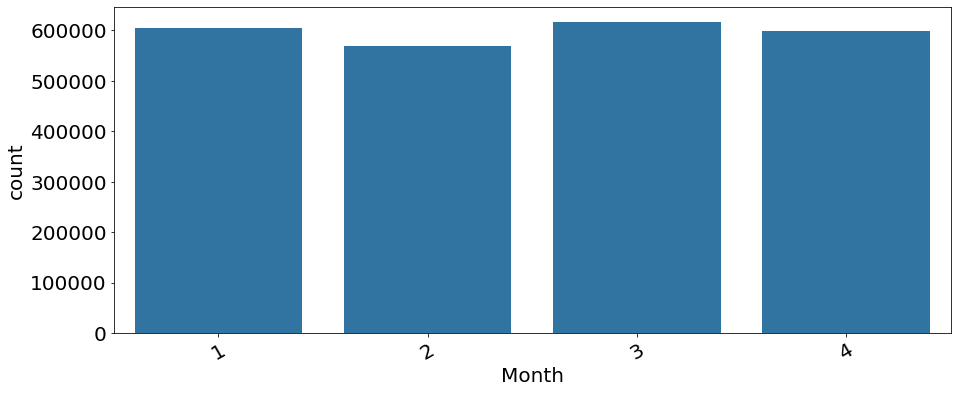

In [19]:
bar_char(df_clean, "Month")

- le jeu de donnee contient juste quatre mois dans l'annee 1, 2, 3, 4
- on peut dire que il n'y a pas une desprerion entre les mois

### Question
- quels sont les jours dans le mois qui ont un nombre plus grand de vols?

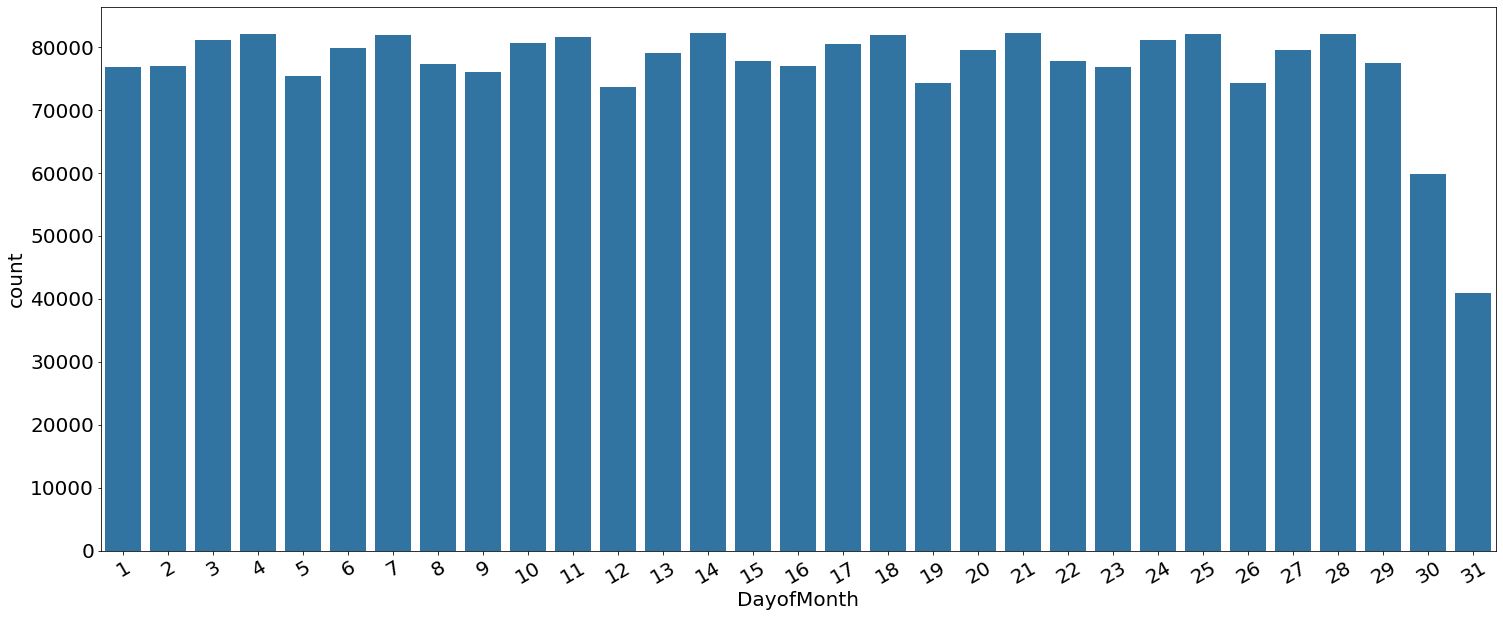

In [20]:
bar_char(df_clean, "DayofMonth", figsize=(25, 10))

### Observations
- les jours qui ont un nombre plus grand de vols sont: 14, 4, 18, 21, 28
- on peut dire que le 31 dans le mois qu'a une valeur plus petite dans le nombre vols mais on n'oublie pas que il y a juste 6 mois qui ont le 31
- le jour 30 aussi a une valeur plus petite

### Question
- quel est le jour dans la semaine a un nombre plus grande de vols?
- est-ce on a la meme valeur ou il y a une dispersion?

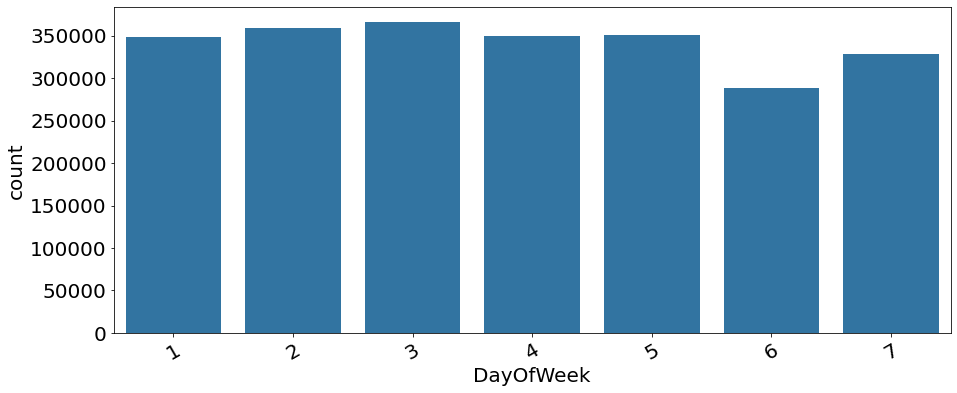

In [21]:
bar_char(df_clean, "DayOfWeek")

### observation
- le jour 6 a la valeur le plus petite de vols 
- on peut dire que la distribution est homogene

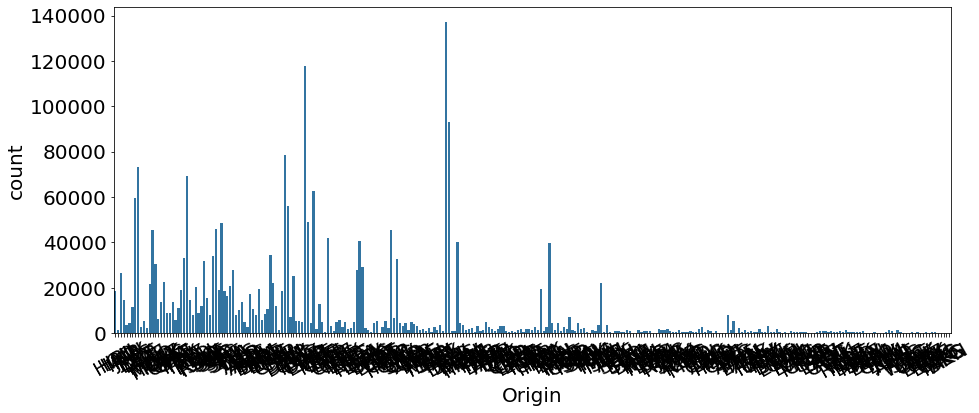

In [22]:
bar_char(df_clean, "Origin")

- on ne peut pas faire une conclusion
- faut amelioer ce diagramme

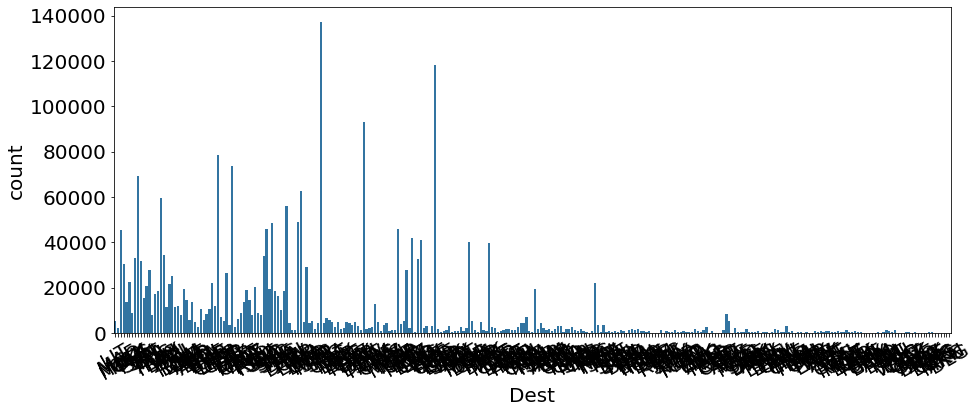

In [23]:
bar_char(df_clean, "Dest")

- on ne peut pas faire une conclusion
- faut ameliorer ce diagramme

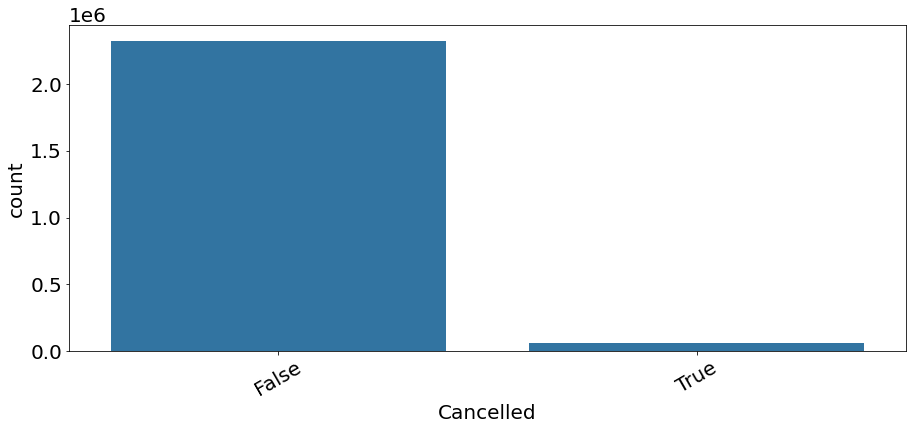

In [24]:
bar_char(df_clean, "Cancelled")

- les vols non annulees sont tres grande que les vole annulees

### Question
- les causes les plus populaire pour annuler une vols

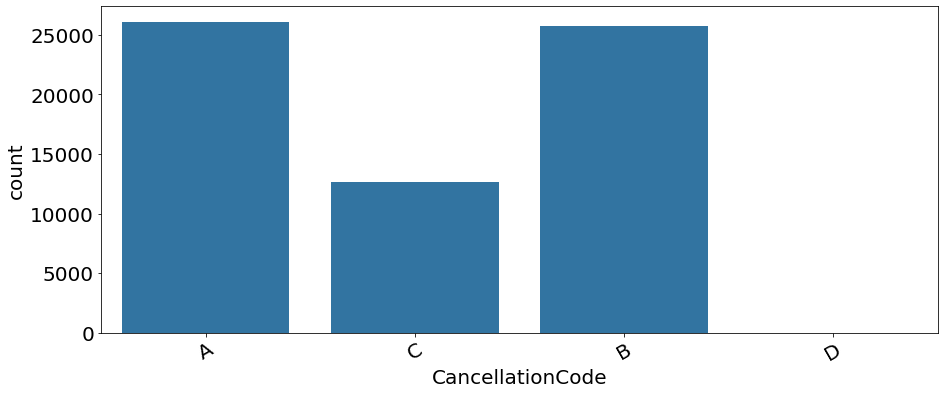

In [25]:
bar_char(df_clean, "CancellationCode")

- on peut voir que les vols annule en raison du Carrier, weather et National avaition system

### Question
- quel est le pourcentage des vols detourne?

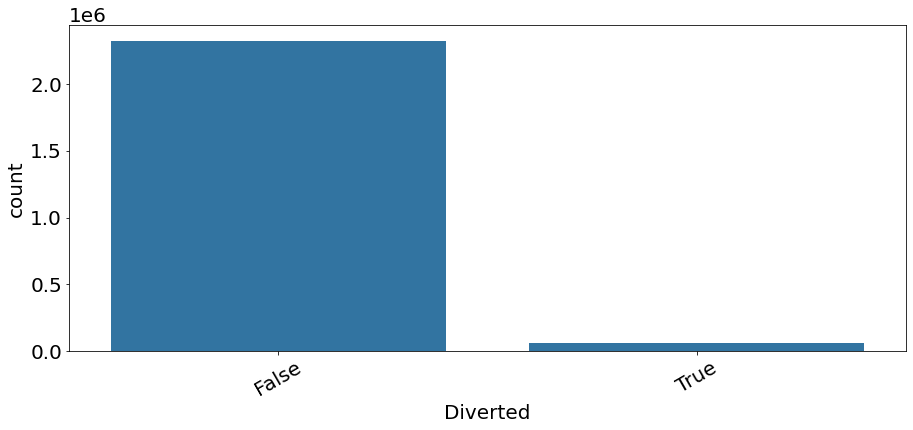

In [26]:
bar_char(df_clean, 'Diverted')

- le nombre de vols détourné est tres petit

### Question
- quelles sont les compagnies les plus demandees

<AxesSubplot:xlabel='count', ylabel='UniqueCarrier'>

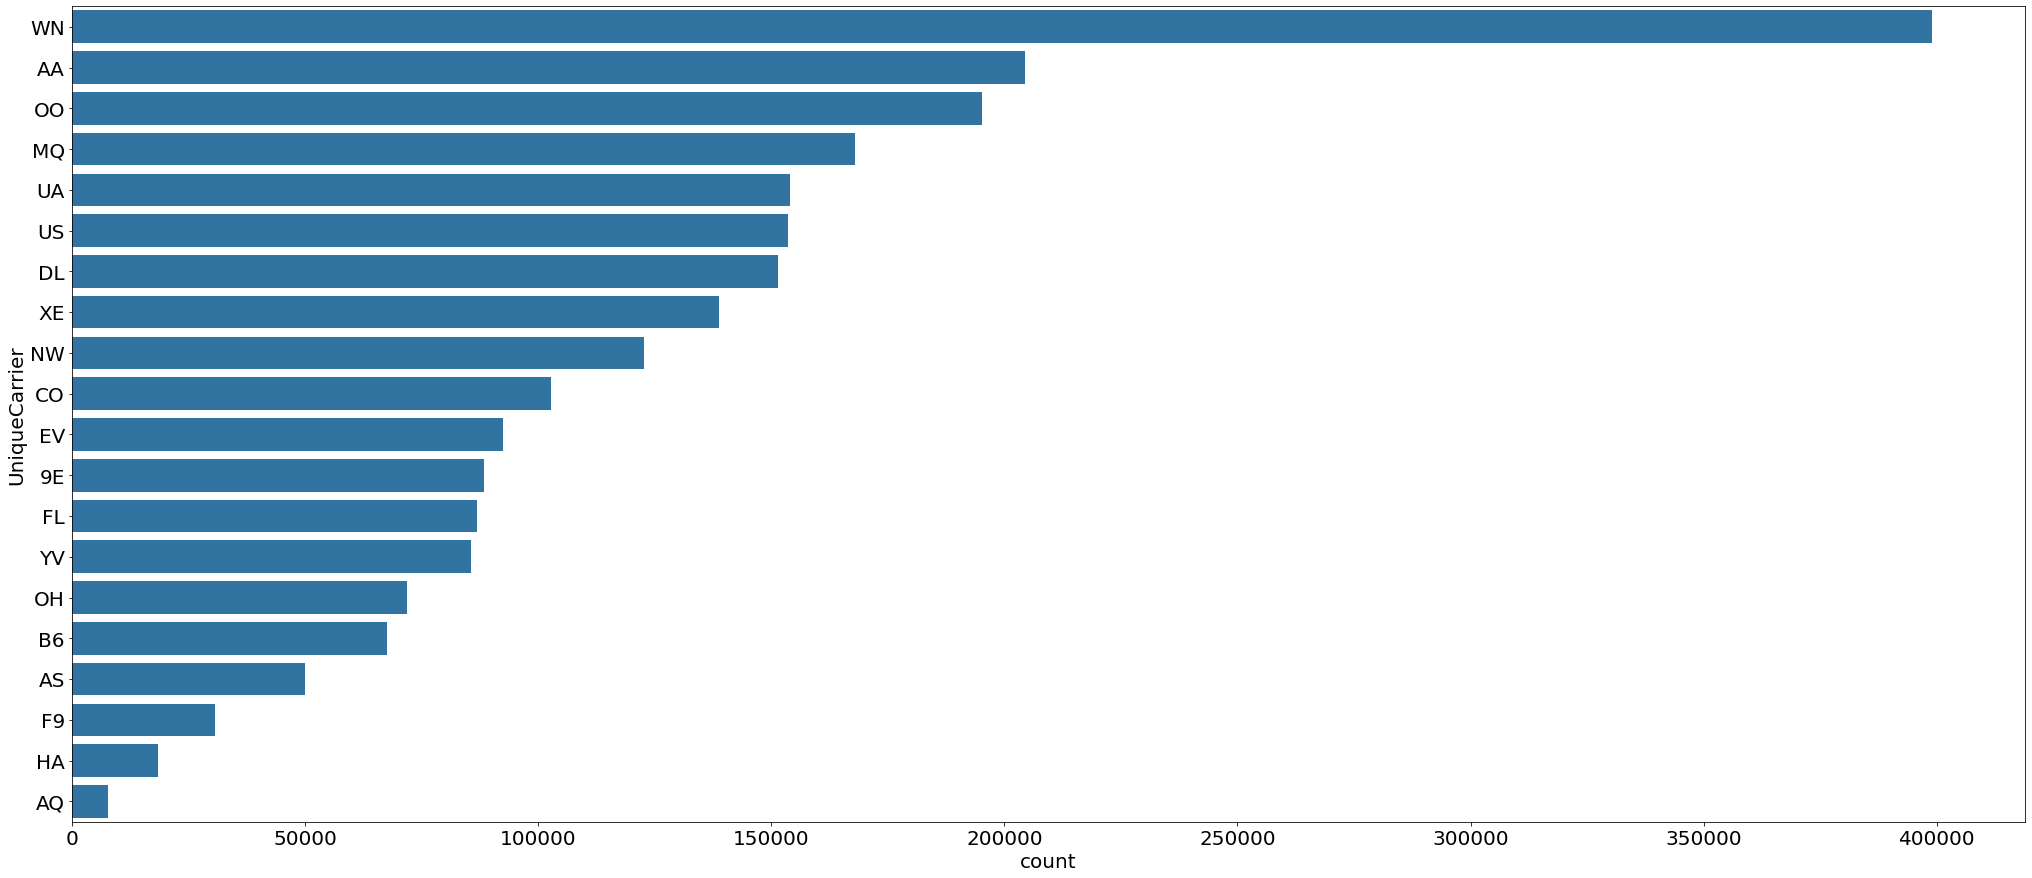

In [27]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(35, 15))
order = df_clean.UniqueCarrier.value_counts().index
sb.countplot(data=df_clean, y="UniqueCarrier", color=base_color, order=order)

- on peut voir que les compagnies principales ou les plus demandees (Wn, AA, OO, MQ, UA, US, DL)
- il y a une grande desprission entre les comapgnies dans le nombre de vols

In [28]:
def hist_data(df, column_name, x_label, bins):
    plt.figure(figsize=(12, 8))
    plt.hist(data=df, x=column_name, bins=bins)
    plt.xlabel(x_label)

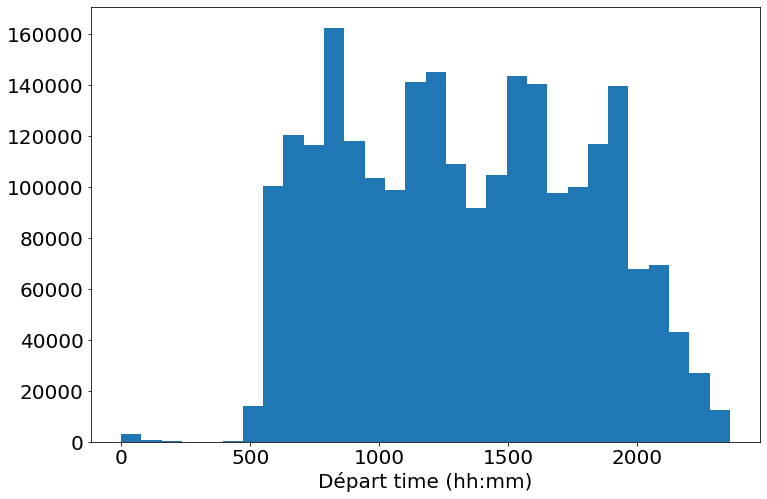

In [29]:
hist_data(df_clean, 'CRSDepTime', 'Départ time (hh:mm)', bins=30)

- on peut voir un nombre petit de vols avant le 5 du matin

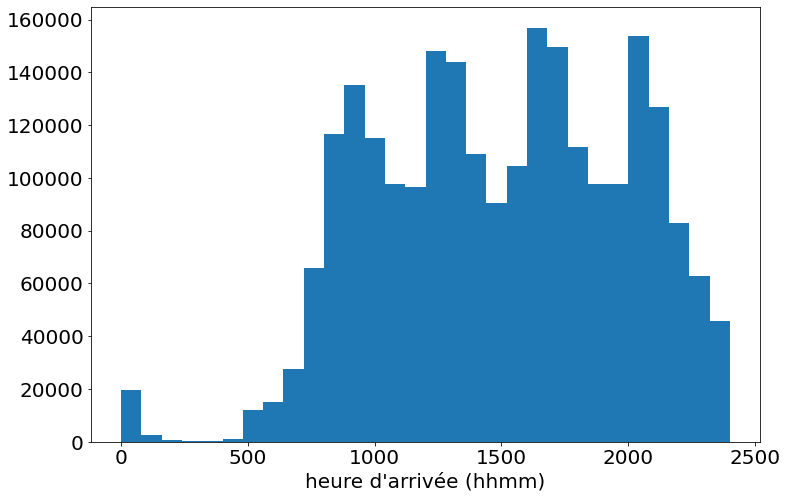

In [30]:
hist_data(df_clean, 'CRSArrTime', 'heure d\'arrivée (hhmm)', bins=30)

- meme on peut voir un nombre petit de vols avant le 5 du matin
- on peut voir que les deux destribution sont semblable
- il ya des heure le nombre de vols est tres grande(9, 12. 15, 21)

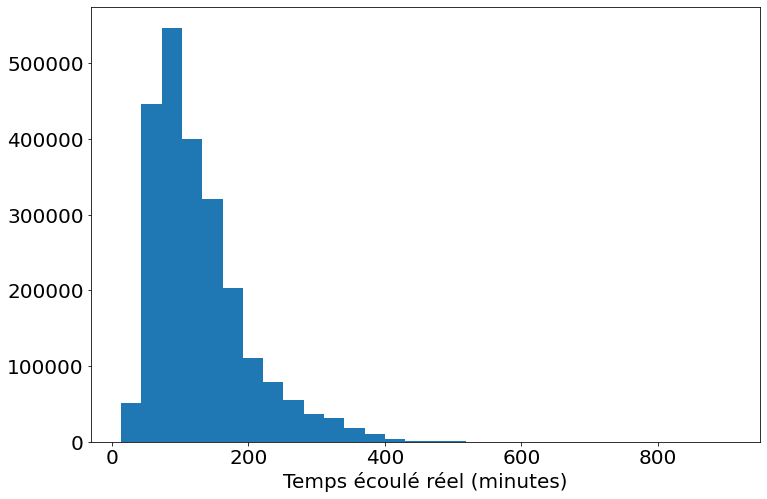

In [31]:
hist_data(df_clean, 'ActualElapsedTime', 'Temps écoulé réel (minutes)', 30)

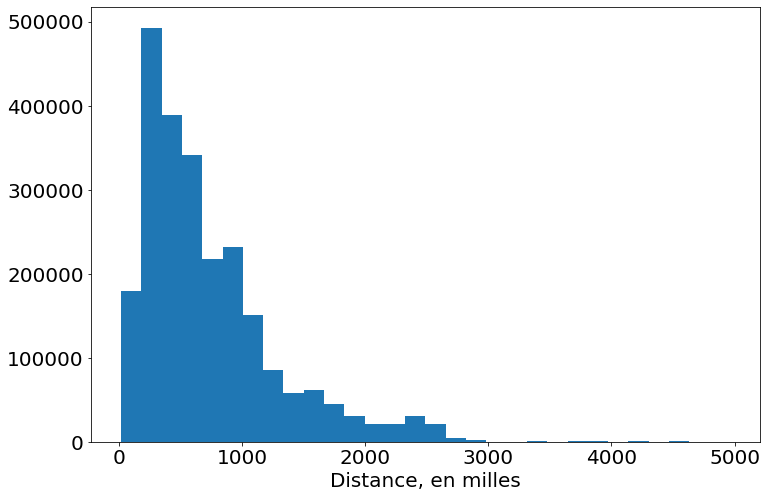

In [32]:
hist_data(df_clean, 'Distance', 'Distance, en milles', 30)

- on peut voir que le tempe ecoule reel et depent de la distance des vols

Text(0.5, 0, 'Retard de départ en minutes')

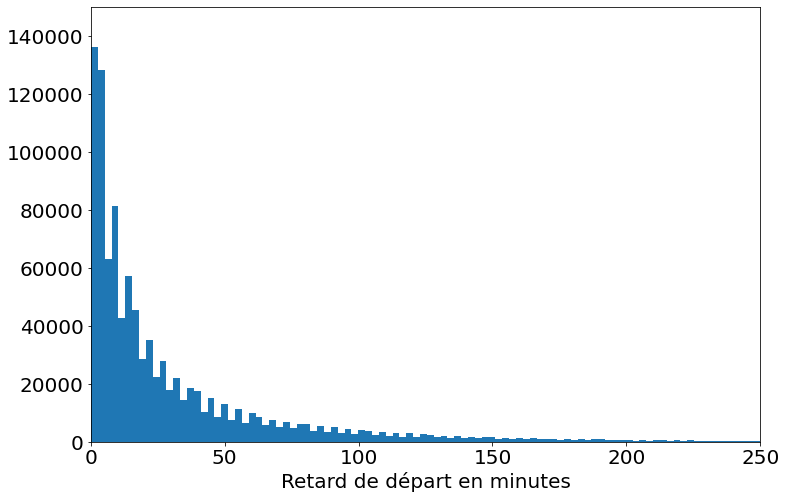

In [33]:
plt.figure(figsize=(12, 8))
plt.hist(data=df_clean, x='DepDelay', bins=1000)
plt.xlim((0, 250))
plt.ylim((0, 150000))
plt.xlabel('Retard de départ en minutes')

Text(0.5, 0, "Retard d'arrivee en minutes")

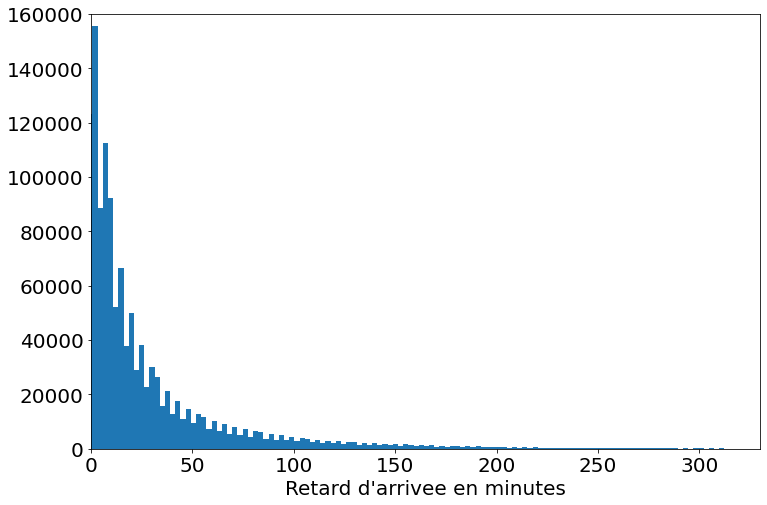

In [34]:
plt.figure(figsize=(12, 8))
plt.hist(data=df_clean, x='ArrDelay', bins=1000)
plt.xlim((0, 330))
plt.ylim((0, 160000))
plt.xlabel('Retard d\'arrivee en minutes')

In [35]:
# fonction qui permet d'afficher les boxplot
def plot_boxplot(dataframe, name_column, vert=False, figsize=(30, 5)):
    plt.title(f'boîte à moustache de la variable "{name_column}"')
    dataframe[name_column].plot(kind='box', figsize=figsize, vert=vert)

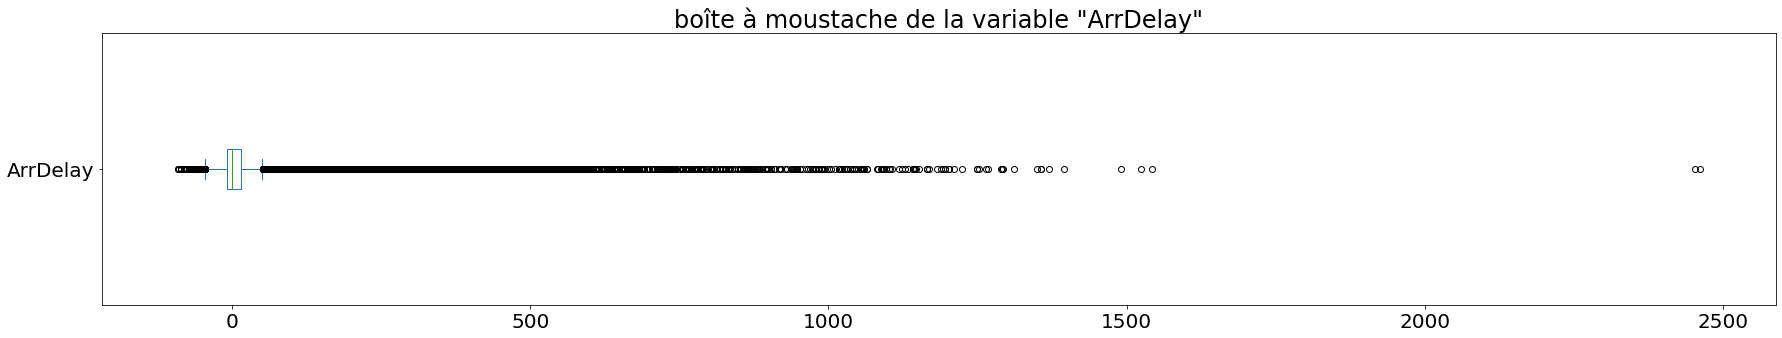

In [36]:
plot_boxplot(df_clean, 'ArrDelay')

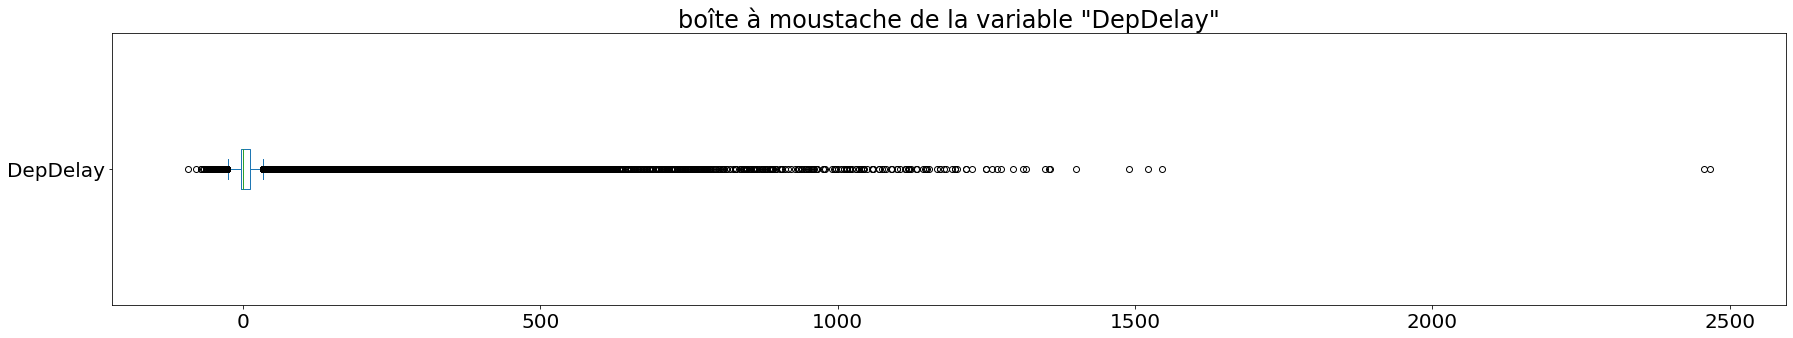

In [37]:
plot_boxplot(df_clean, 'DepDelay')

- dans les deux colonnes *DepDely* et *ArrDelay* il a beaucoup de valeur aberrantes
- pour les valeur manquantes: il ya beaucoup de valeur manquantes donc on va supprimer les valeur qui superieure a 1400

In [38]:
df_clean.DepDelay.describe()

count    2.324771e+06
mean     1.143634e+01
std      3.653231e+01
min     -9.200000e+01
25%     -4.000000e+00
50%      0.000000e+00
75%      1.100000e+01
max      2.467000e+03
Name: DepDelay, dtype: float64

In [39]:
df_clean.ArrDelay.describe()

count    2.319117e+06
mean     1.027355e+01
std      3.963431e+01
min     -9.100000e+01
25%     -9.000000e+00
50%      0.000000e+00
75%      1.500000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

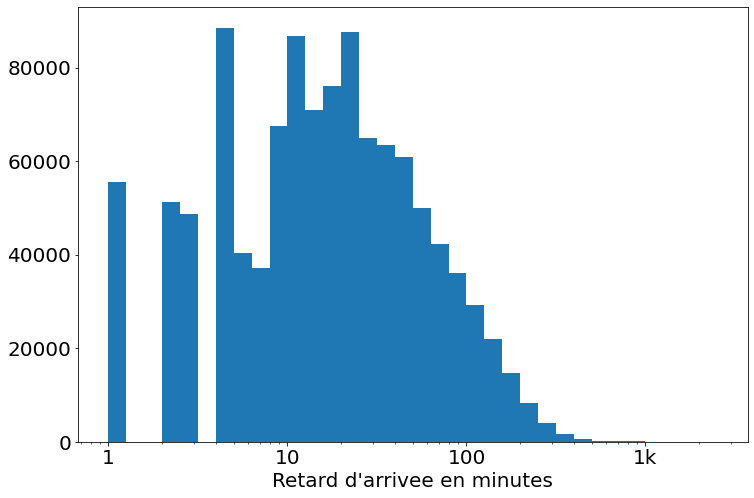

In [40]:
bins = 10 ** np.arange(0, np.log10(df_clean.ArrDelay.max())+0.1, 0.1)
plt.figure(figsize=(12, 8))
plt.hist(data=df_clean, x='ArrDelay', bins=bins)
plt.xscale('log')
plt.xlabel('Retard d\'arrivee en minutes')
plt.xticks([1, 10, 100, 1000], [1, 10, 100, '1k']);

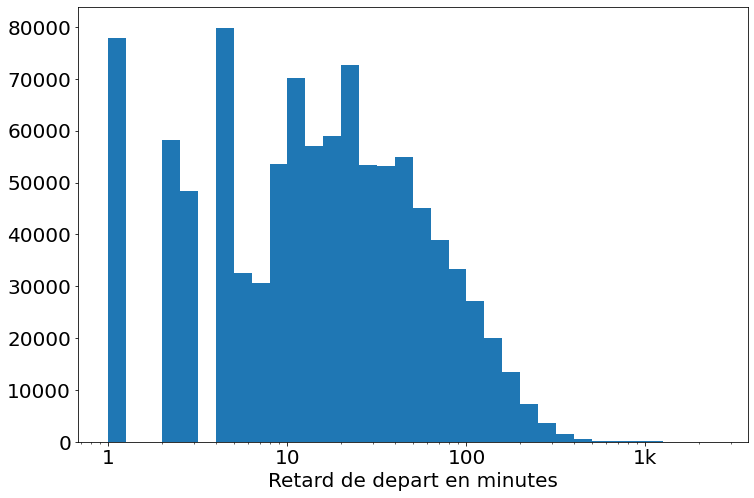

In [41]:
bins = 10 ** np.arange(0, np.log10(df_clean.DepDelay.max())+0.1, 0.1)
plt.figure(figsize=(12, 8))
plt.hist(data=df_clean, x='DepDelay', bins=bins)
plt.xscale('log')
plt.xlabel('Retard de depart en minutes')
plt.xticks([1, 10, 100, 1000], [1, 10, 100, '1k']);

In [42]:
df_clean = df_clean.query('ArrDelay <= 1400 and DepDelay <= 1400')
df_clean.shape

(2319110, 26)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> oui j ai analyser les variables que m'interse, oui il ya beaucoup de valeur aberrante dans les deux colonnes DepDely et ArrDelay, oui j ai  fait une transformation

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> oui j ai supprime les valeurs aberantes, les valeurs dupliques, changemen|t du type,

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [43]:
def nuage_point(df, name_column_x, name_column_y, title, xlabel, ylabel,
                fig=(15, 10)):
    plt.figure(figsize=fig)
    plt.scatter(data=df, x=name_column_x, y=name_column_y)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.title(title)
    plt.show()

### Question
- est-ce il ya une relation entre le retard de depart et le retard d'arrivee?

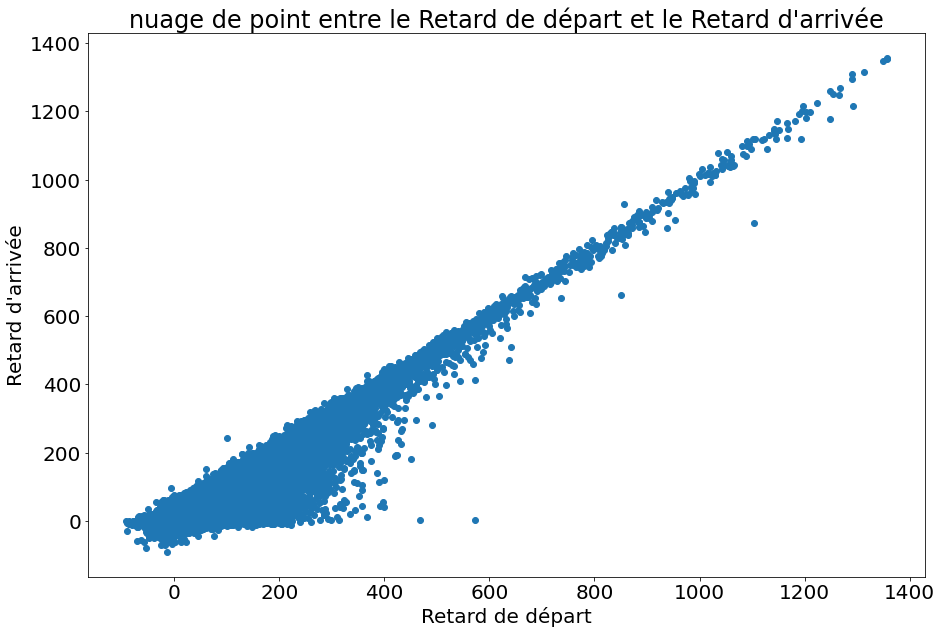

In [44]:
nuage_point(df_clean, 'ArrDelay', 'DepDelay', 'nuage de point'
            ' entre le Retard de départ et le Retard d\'arri'
            'vée', 'Retard d\'arrivée', 'Retard de départ')

- on peut voir une forte correlation entre les deux variables

### Question
- Y a-t-il une relation entre la distance et le temp ecoule reel?

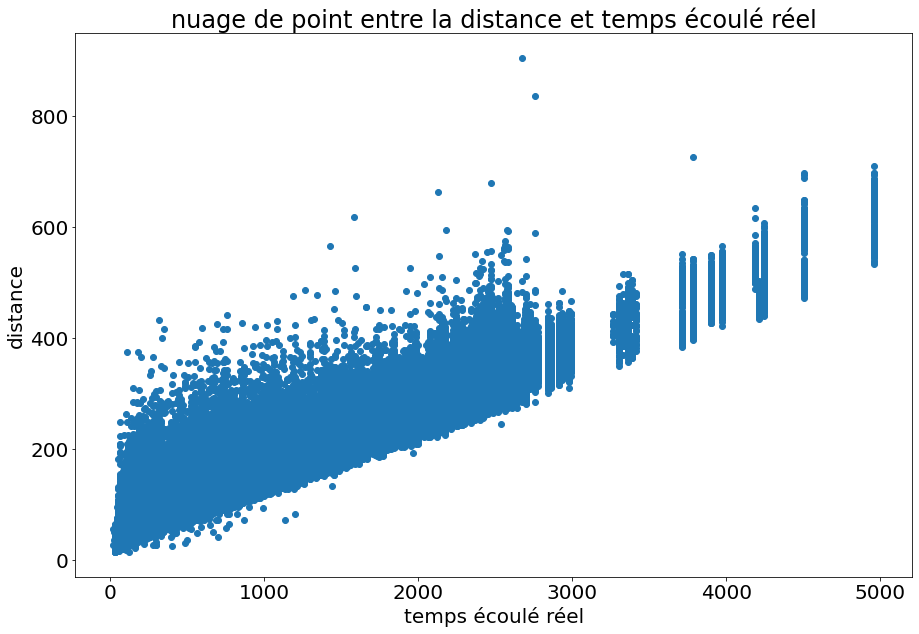

In [45]:
nuage_point(df_clean, 'Distance', 'ActualElapsedTime', 'nuage'
            ' de point entre la distance et temps écoulé réel',
            'distance', 'temps écoulé réel')

- on peut voir une correlation entre les deux variable

In [46]:
df_clean.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

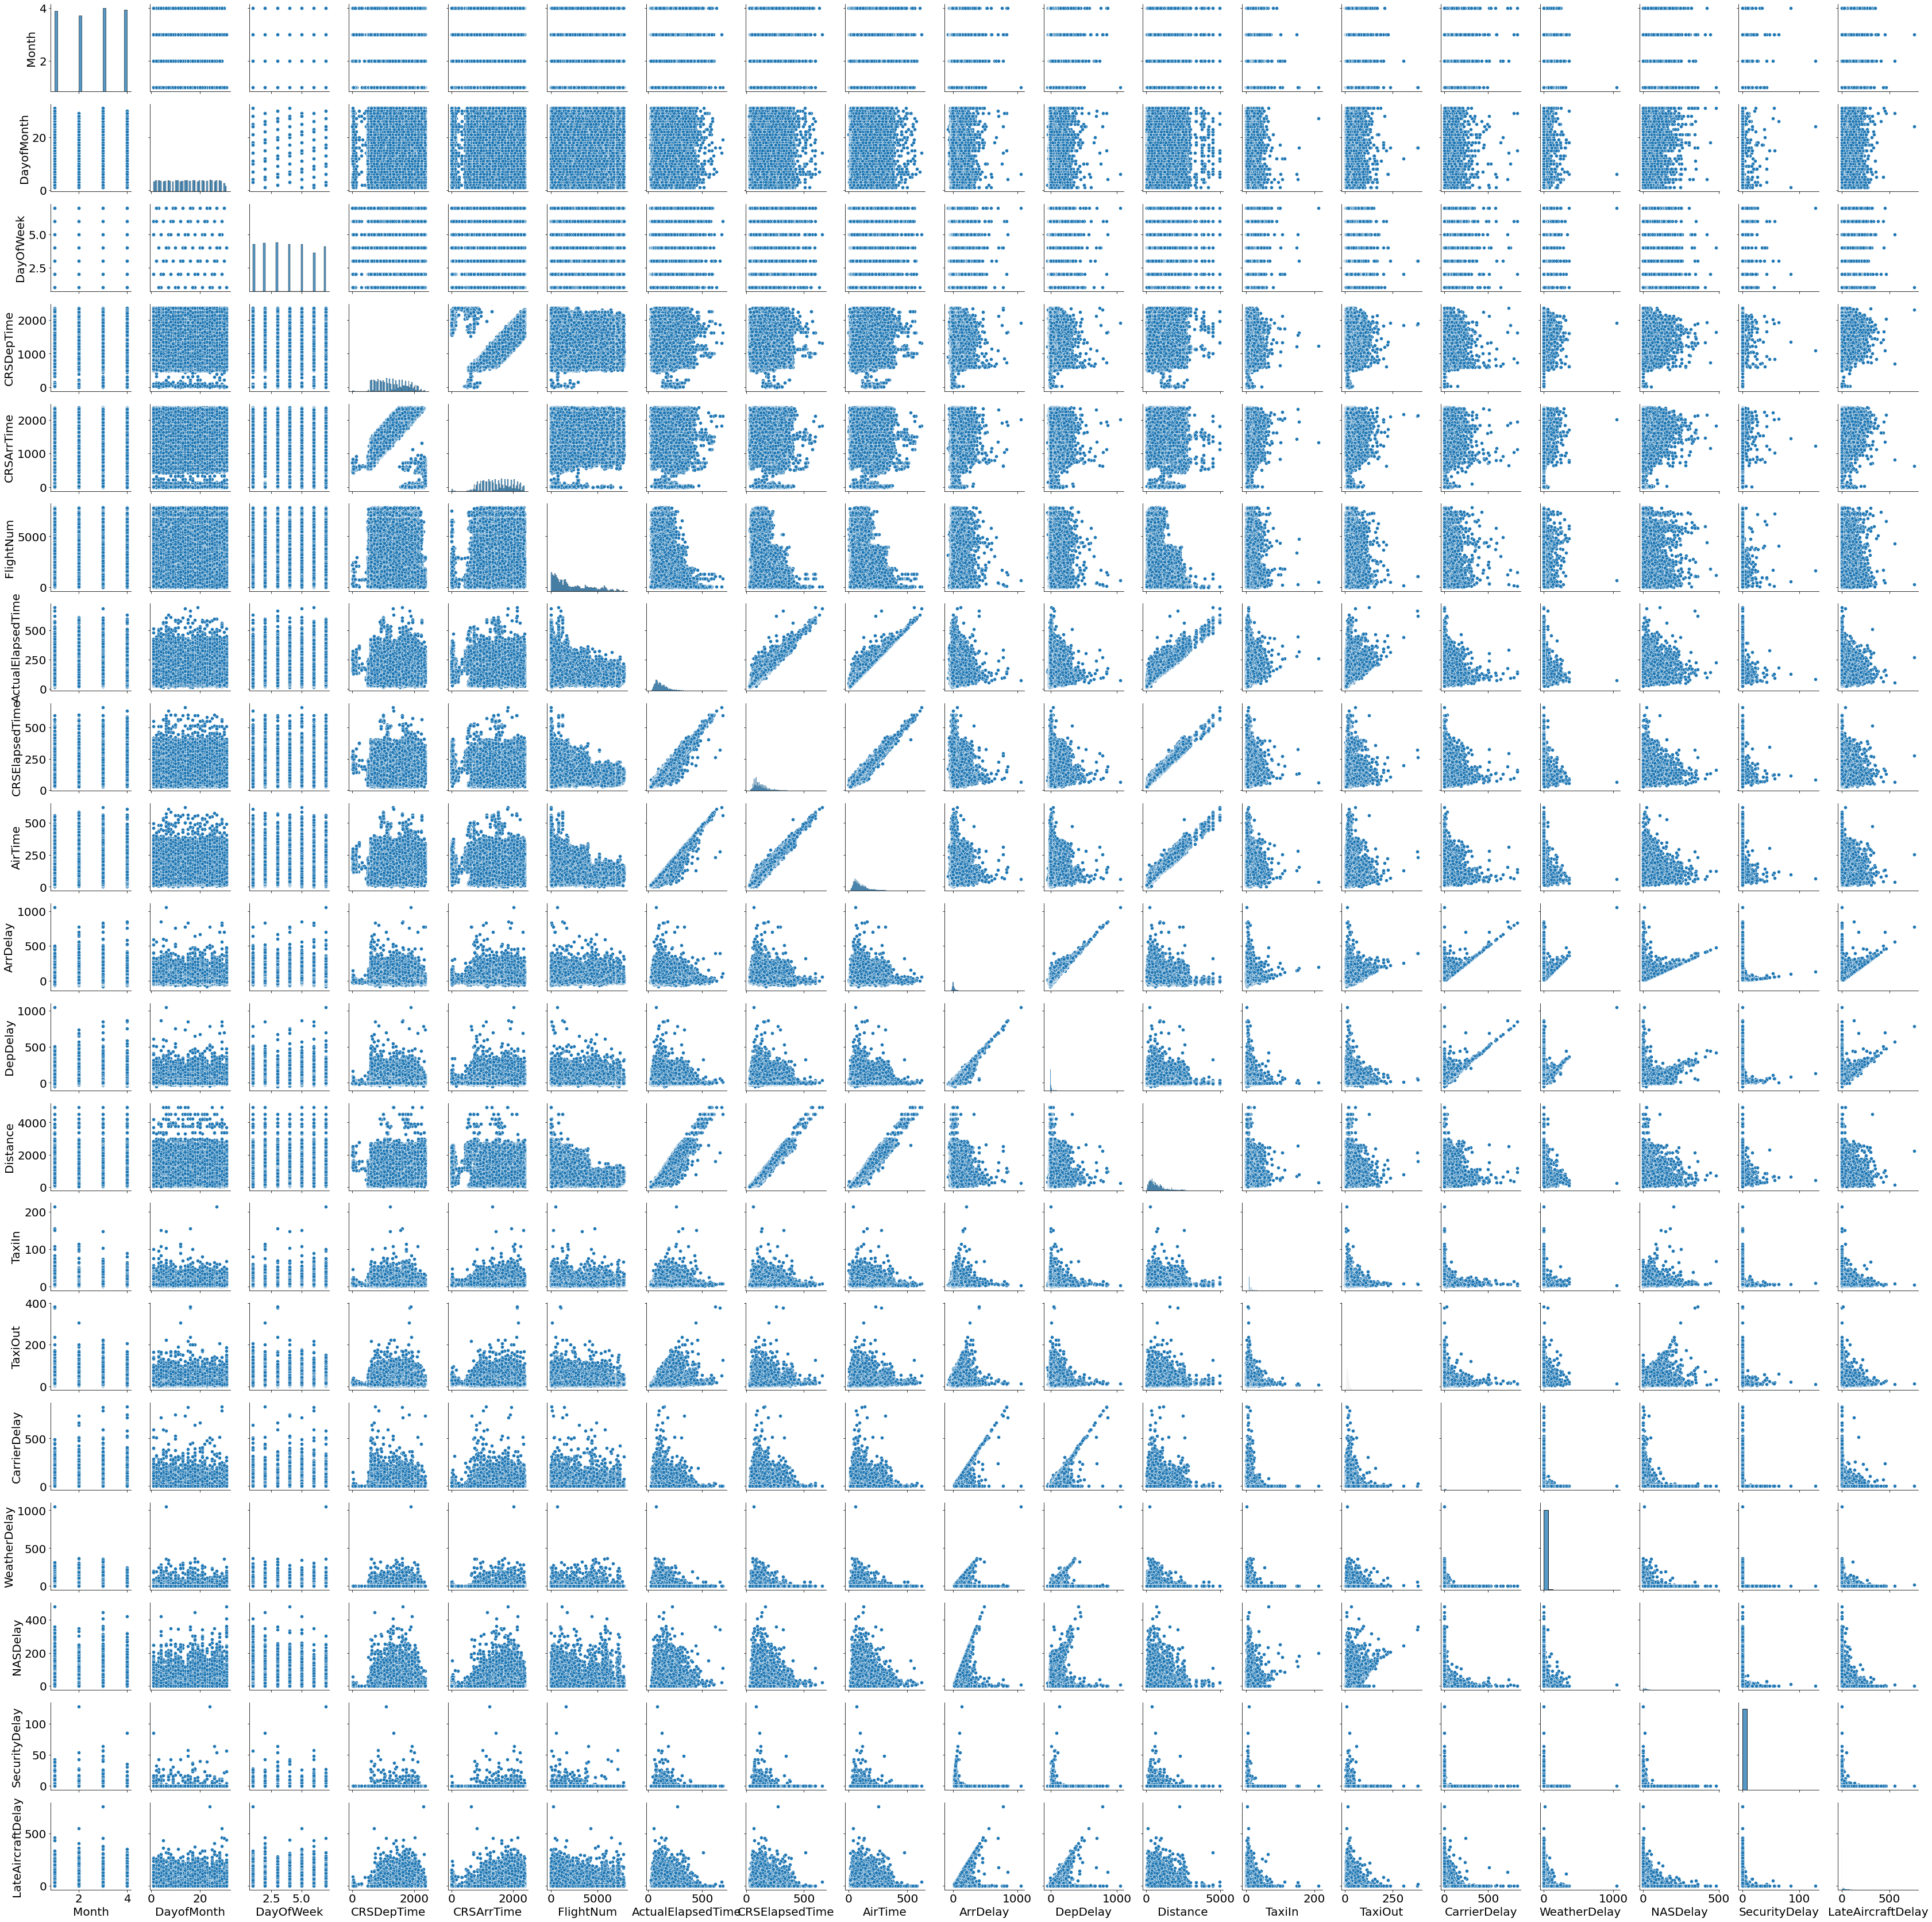

In [47]:
# y a-t-il une relation entre les variable
sb.pairplot(df_clean.sample(100000).select_dtypes(include=['int', 'float']));

- on peut voir la corelation entre les variable 
- la colonne ArraDelay et DepDelay sont correlees avec *LateAircraftDelay, CarrierDelay*
- correaltion entre AirTime et la distance, la distance et ActualElapsedTime, la distance et ActualElapsedTime

In [48]:
df_clean.describe()[['ArrDelay', 'DepDelay']]

ArrDelay      DepDelay
count  2.319110e+06  2.319110e+06
mean   1.026831e+01  1.138394e+01
std    3.951141e+01  3.629008e+01
min   -9.100000e+01 -9.200000e+01
25%   -9.000000e+00 -4.000000e+00
50%    0.000000e+00  0.000000e+00
75%    1.500000e+01  1.100000e+01
max    1.357000e+03  1.357000e+03

### Question
- Quelles sont les compagnies aériennes ont les plus grands retards de départ?

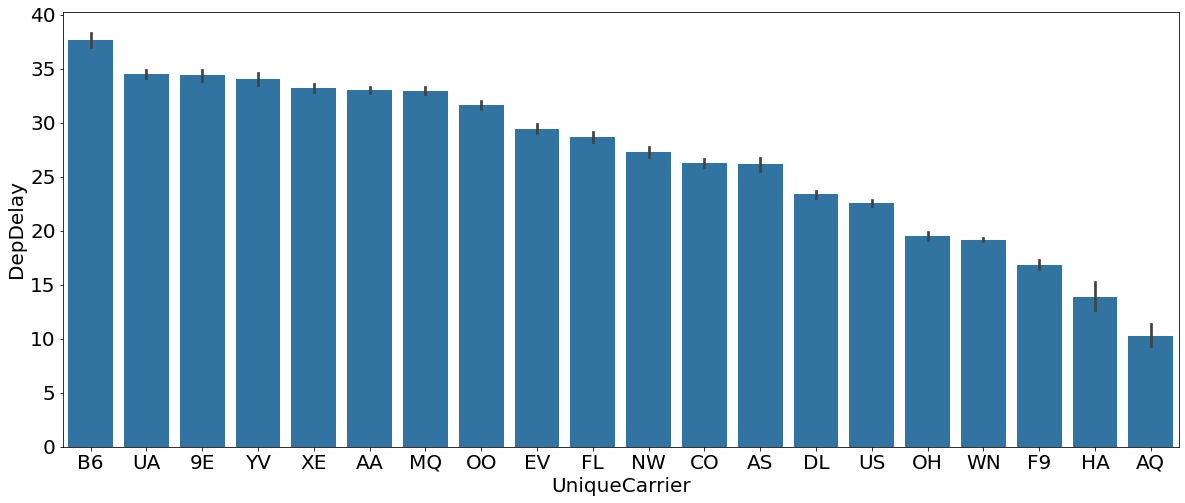

In [49]:
# les principaux retards (le retard de depart) pour les compagnies
plt.figure(figsize=(20, 8))
sb.barplot(data=df_clean.query('DepDelay >= 0'),
           x='UniqueCarrier', y='DepDelay',
           order=df_clean.query('DepDelay >= 0')
           .groupby('UniqueCarrier').DepDelay
           .mean().sort_values(ascending=False)
           .index, color=base_color);

- Les compagnies aériennes B6, UA, 9E ont les plus grands retards de départ
- Les compagnies qui ont les plus valeurs sont AQ et HQ

### Question
- Quelles sont les compagnies aériennes ont les plus grands retards de d'arrivee?

<AxesSubplot:xlabel='UniqueCarrier', ylabel='ArrDelay'>

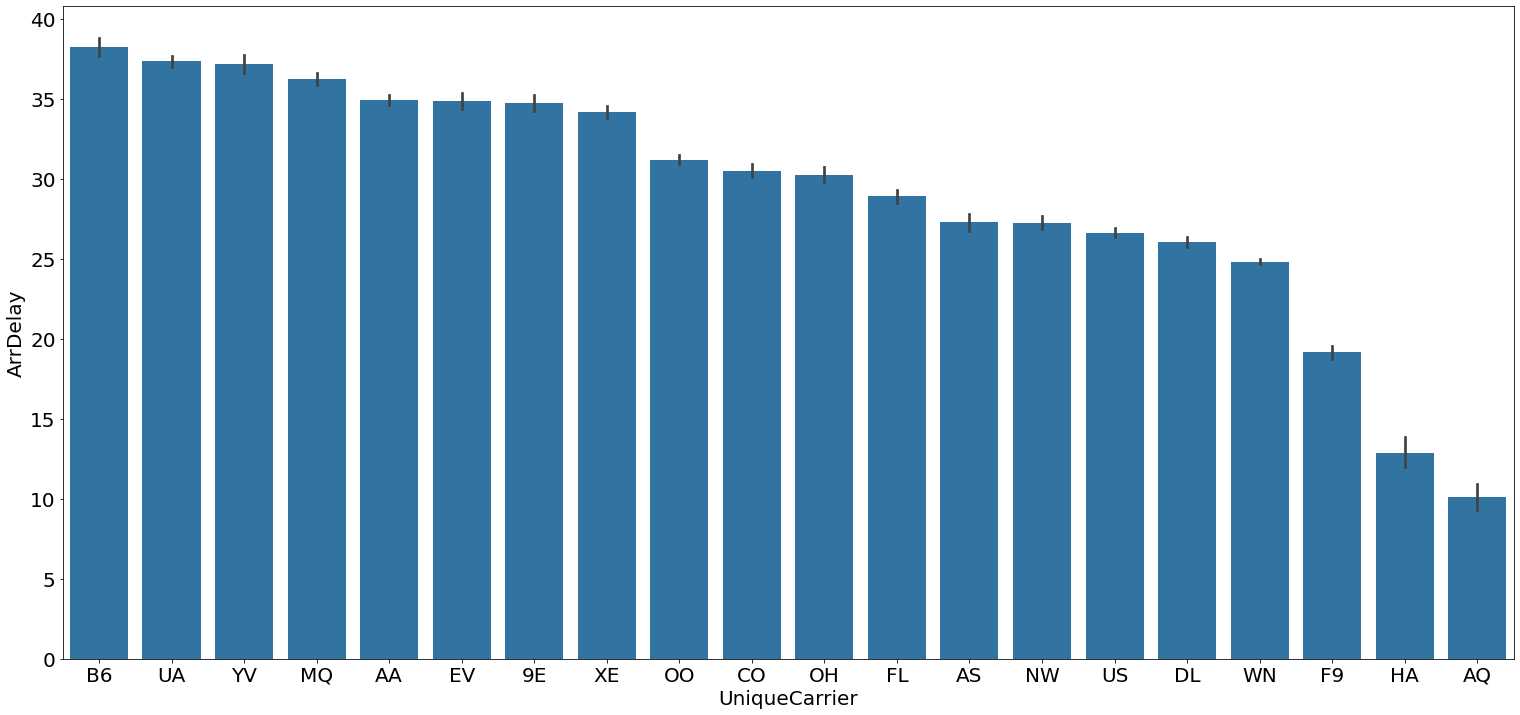

In [50]:
# les principaux retards (le retard d'arrivee) pour les compagnies
plt.figure(figsize=(26, 12))
order = df_clean.query('ArrDelay >= 0').groupby('UniqueCarrier')
order = order.ArrDelay.mean().sort_values(ascending=False).index
sb.barplot(data=df_clean.query('ArrDelay >= 0'),
           x='UniqueCarrier', y='ArrDelay',
           order=order, color=base_color)

- Les compagnies aériennes B6, UA, YV ont les plus grands retards de départ
- Les compagnies qui ont les plus valeurs sont AQ et HQ

### Observation
- D'apres les deux diagrammes on voir que les meme compagnies qui ont les plus petite et les grande valeur

In [51]:
df_clean_origin = df_clean.Origin.value_counts().sort_values(ascending=False)
df_clean_origin = df_clean_origin.reset_index(name='counts').head(10)
index_df = df_clean_origin['index'].tolist()
df_clean_origin = df_clean[df_clean.Origin.isin(index_df)]

### Question
- les principaux retards (le retard de depart) pour les originaux

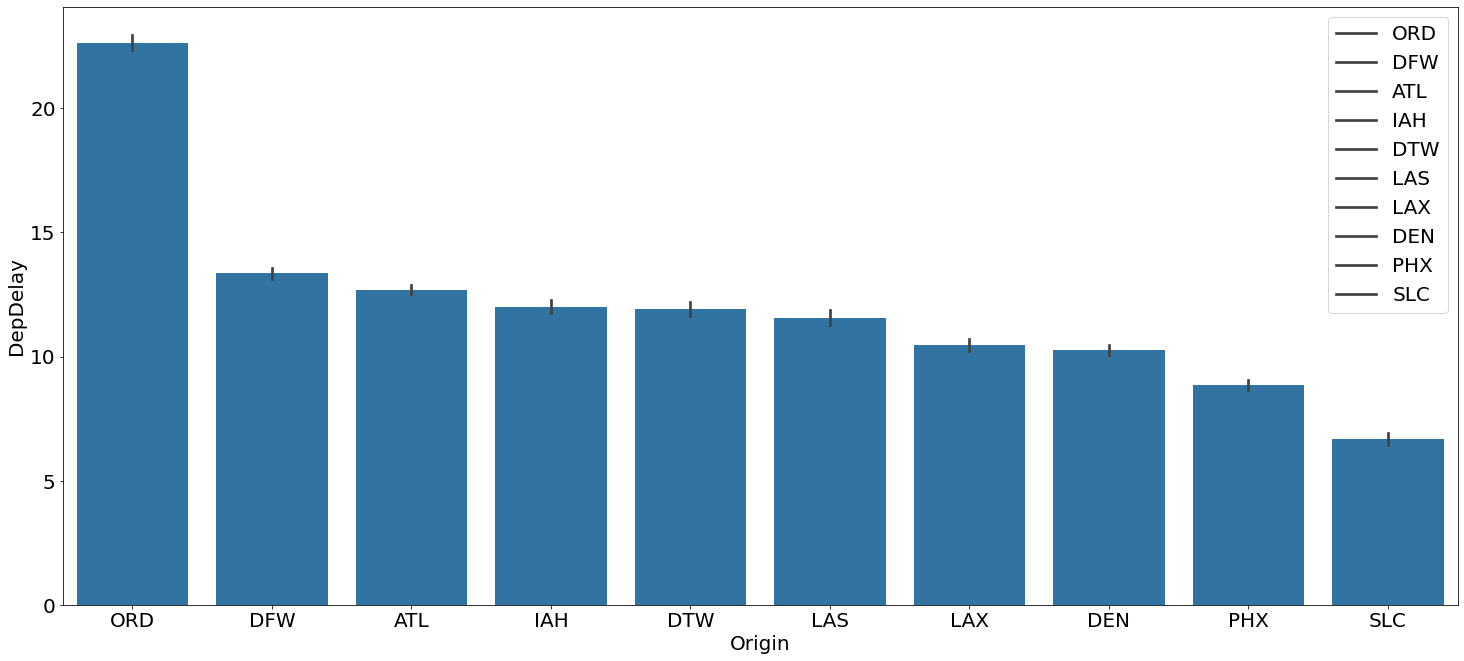

In [52]:
# les principaux retards (le retard de depart) pour les originaux
plt.figure(figsize=(25, 11))
order = df_clean_origin.groupby(['Origin']).DepDelay.mean()
order = order.sort_values(ascending=False).index
sb.barplot(data=df_clean_origin, x='Origin', y='DepDelay',
           color=base_color, order=order)
plt.xlabel('Origin')
plt.ylabel('DepDelay')
plt.legend(order)

- l'origin ORD a la plus valeur de retard de depart

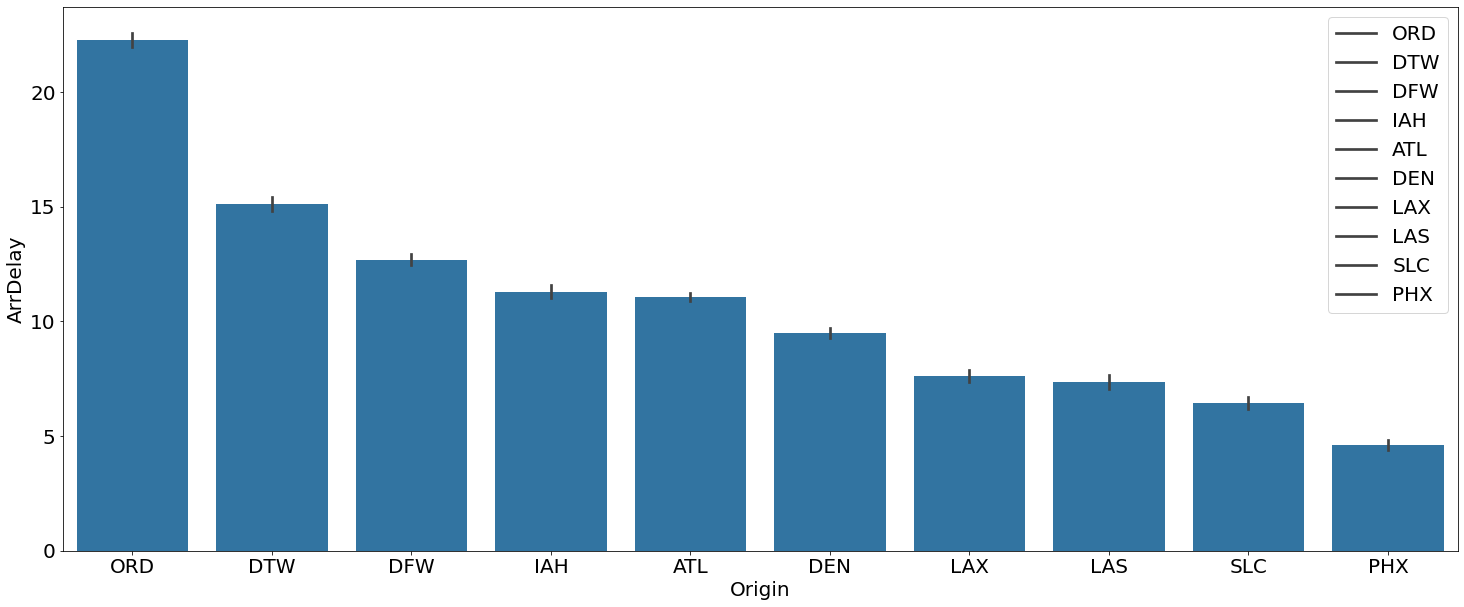

In [53]:
# les principaux retards (le retard d'arrive) pour les compagnies
plt.figure(figsize=(25, 10))
order = df_clean_origin.groupby(['Origin']).ArrDelay.mean()
order = order.sort_values(ascending=False).index
sb.barplot(data=df_clean_origin, x='Origin',
           y='ArrDelay', color=base_color, order=order)
plt.xlabel('Origin')
plt.ylabel('ArrDelay')
plt.legend(order)

- On peut voir que l'origin ORD a la plus valeur de retard de depart et d'arivee

### Question
- les principaux retards (le retard de depart) pour les distinataire

In [54]:
df_clean_dist = df_clean.Dest.value_counts().sort_values(ascending=False)
df_clean_dist = df_clean_dist.reset_index(name='counts').head(10)
df_clean_dist = df_clean[df_clean.Dest.isin(df_clean_dist['index'].tolist())]

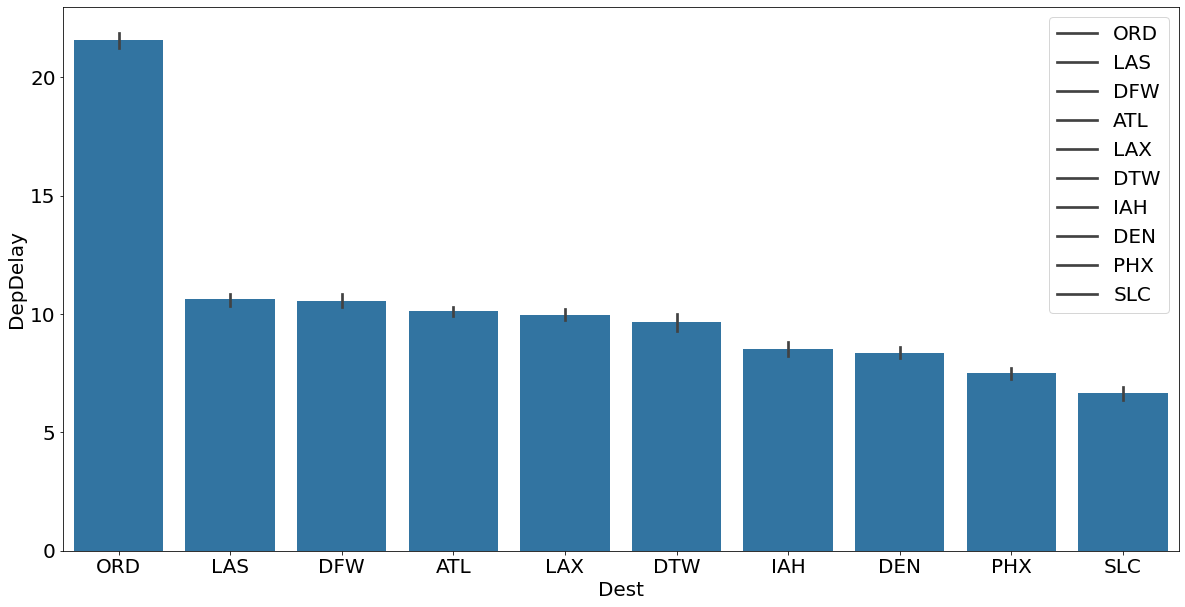

In [55]:
# les principaux retards (le retard de depart) pour les distinataire
plt.figure(figsize=(20, 10))
order = df_clean_dist.groupby(['Dest']).DepDelay.mean()
order = order.sort_values(ascending=False).index
sb.barplot(data=df_clean_dist, x='Dest', y='DepDelay',
           color=base_color, order=order)
plt.xlabel('Dest')
plt.ylabel('DepDelay')
plt.legend(order)

### Question
- les principaux retards (le retard d'arrive) pour les distinataire

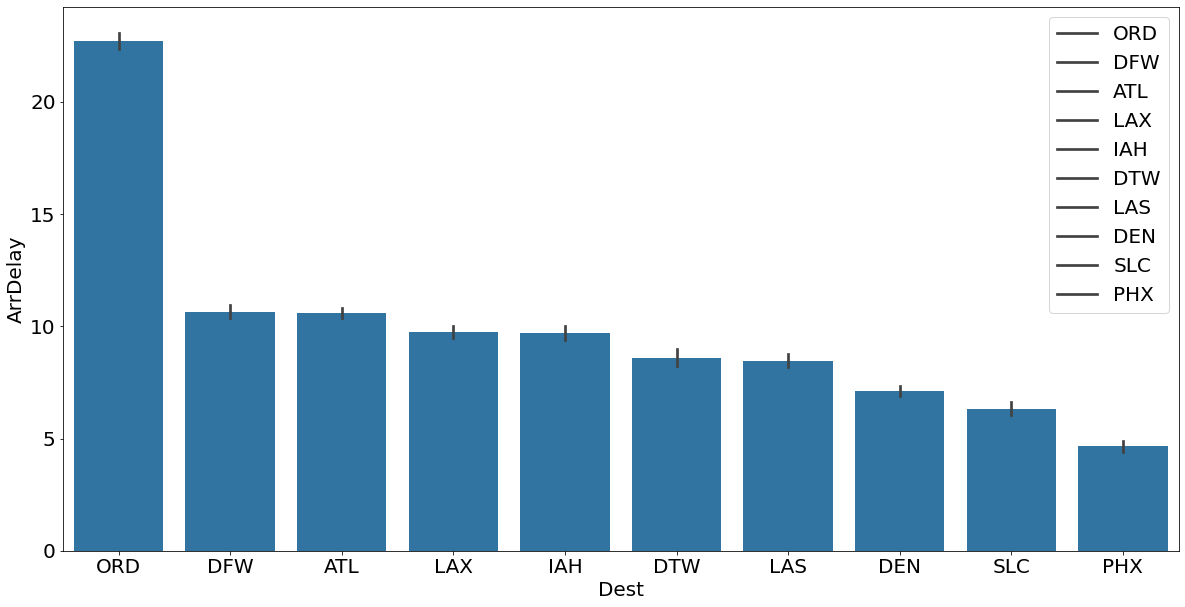

In [56]:
# les principaux retards (le retard d'arrive) pour les distinataire
plt.figure(figsize=(20, 10))
order = df_clean_dist.groupby(['Dest']).ArrDelay.mean()
order = order.sort_values(ascending=False).index
sb.barplot(data=df_clean_dist, x='Dest', y='ArrDelay',
           color=base_color, order=order)
plt.xlabel('Dest')
plt.ylabel('ArrDelay')
plt.legend(order)

### Question
- Quelles sont les compagnies les plus populaire par origins?

<AxesSubplot:xlabel='Origin', ylabel='count'>

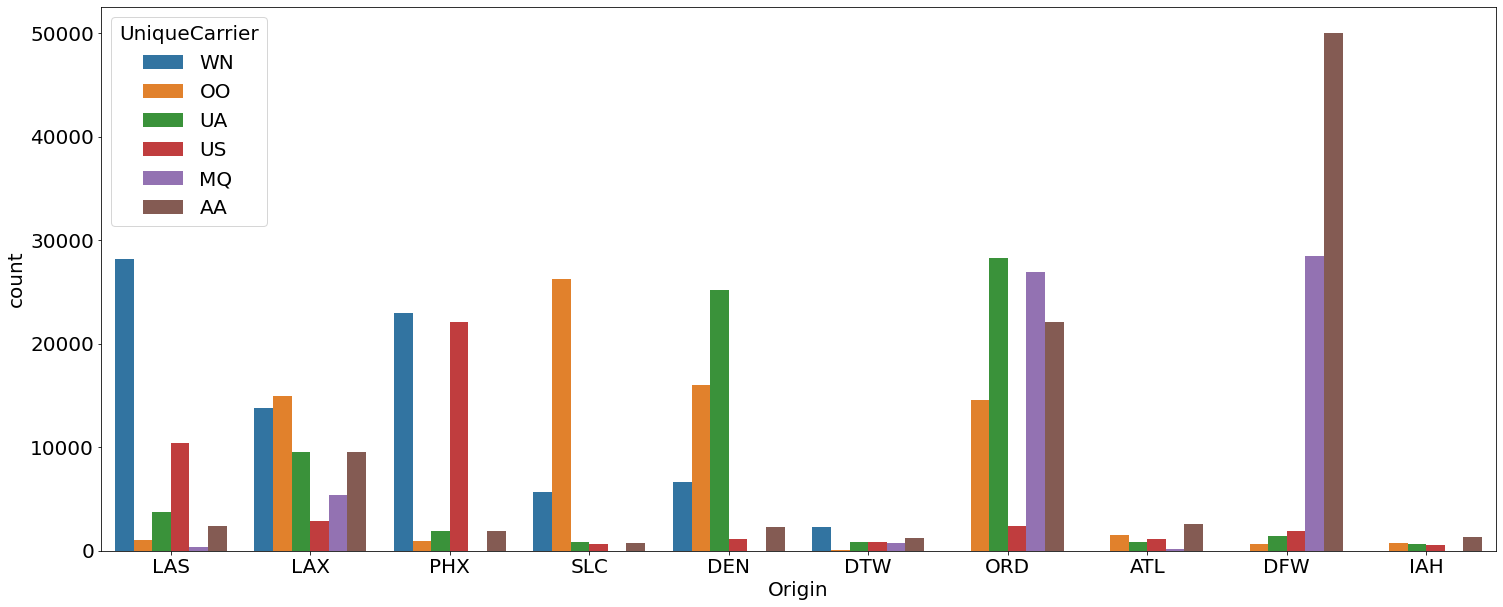

In [57]:
# on va analyser les origins
Companies = df_clean.UniqueCarrier.value_counts().head(6).index.tolist()
df_clean_origin_com = df_clean_origin[df_clean_origin.UniqueCarrier.isin(Companies)]
plt.figure(figsize=(25, 10))
sb.countplot(data=df_clean_origin_com, x='Origin', hue='UniqueCarrier')

- on peut voir que companie AA a la plus grande valeur de vols 
- il y a aussi une grande dispersion entre les origin et les compagnes
- il y a aussi une grande dispersion entre le nombre de vols dans les compagnies dans chaque origin

### Question
- Quelles sont les compagnies les plus populaire par distinataire?

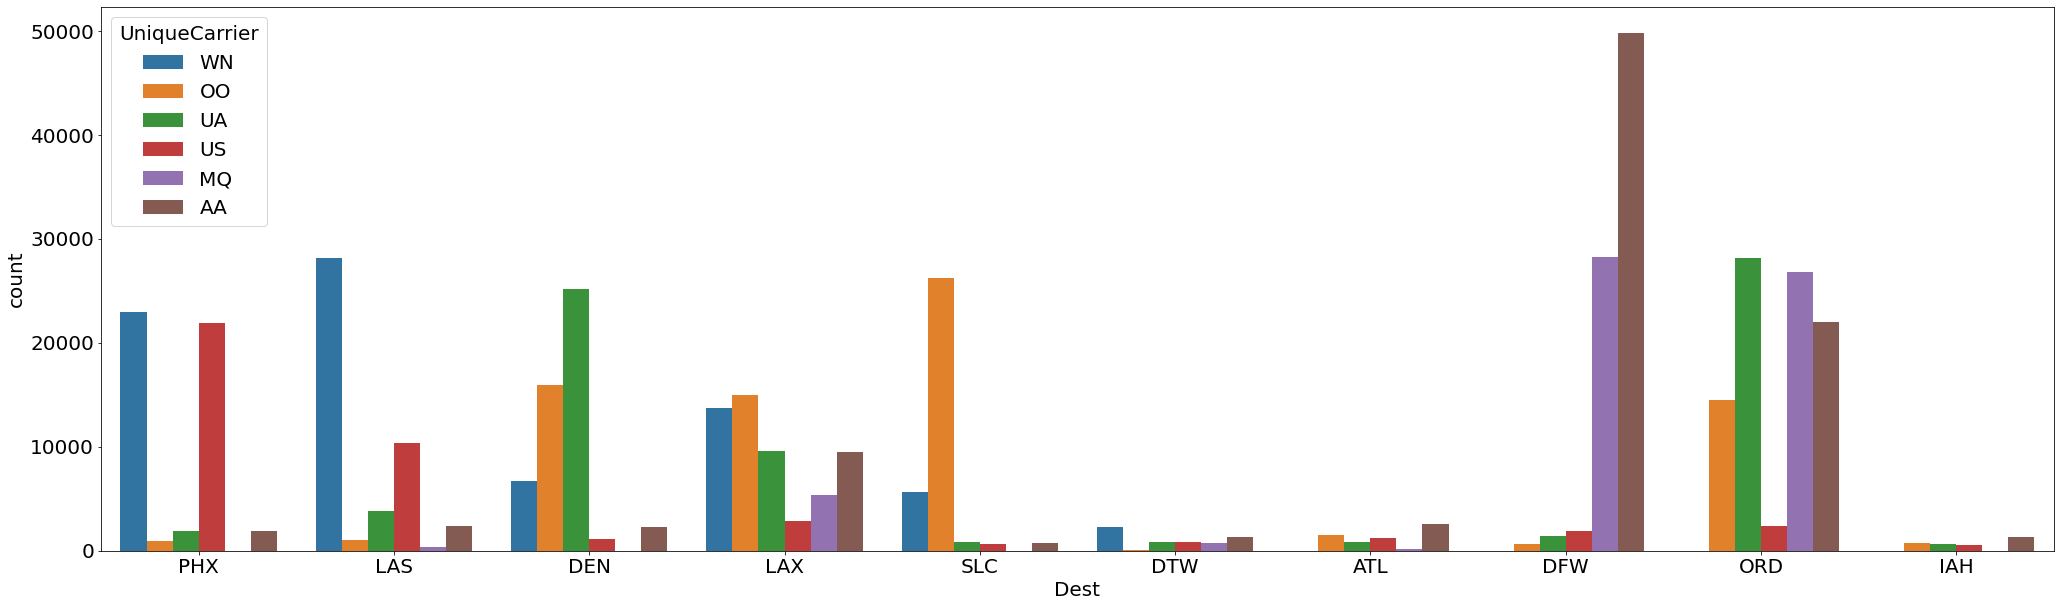

In [58]:
# on va analyse les routes
Companies = df_clean.UniqueCarrier.value_counts().head(6).index.tolist()
df_clean_dist_com = df_clean_dist[df_clean_dist.UniqueCarrier.isin(Companies)]
plt.figure(figsize=(35, 10))
sb.countplot(data=df_clean_dist_com, x='Dest', hue='UniqueCarrier');

- on peut voir que companie AA a la plus grande valeur de vols 
- il y a aussi une grande dispersion entre les origin et les compagnes

- on peut voir que la companie AA a la plus nombre de vols selon le distinataire et l'origin

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Je vois que les retards de vol sont liés à "l'origine, la compagnie" mais ont beaucoup à voir avec l'origine

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Comme prévu, il existe une relation linéaire entre les retards à l'arrivée et au départ et entre la distance et le temps écoulé. Il existe également des itinéraires avec un grand nombre de vols.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

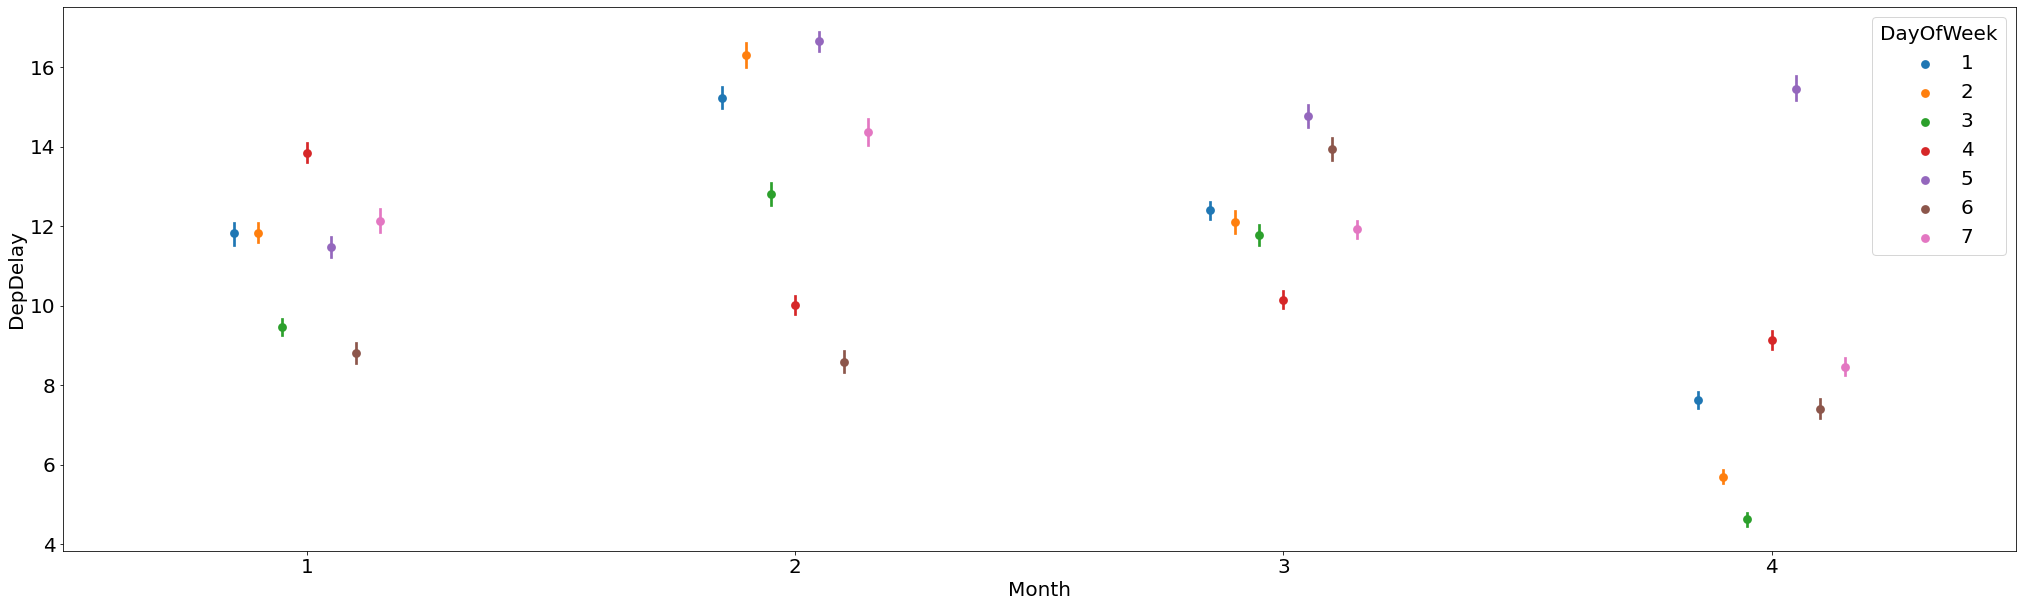

In [59]:
plt.figure(figsize=(35, 10))
sb.pointplot(data=df_clean, x='Month', y='DepDelay',
             hue='DayOfWeek', linestyles='', dodge=0.3);

/home/ay/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ay/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


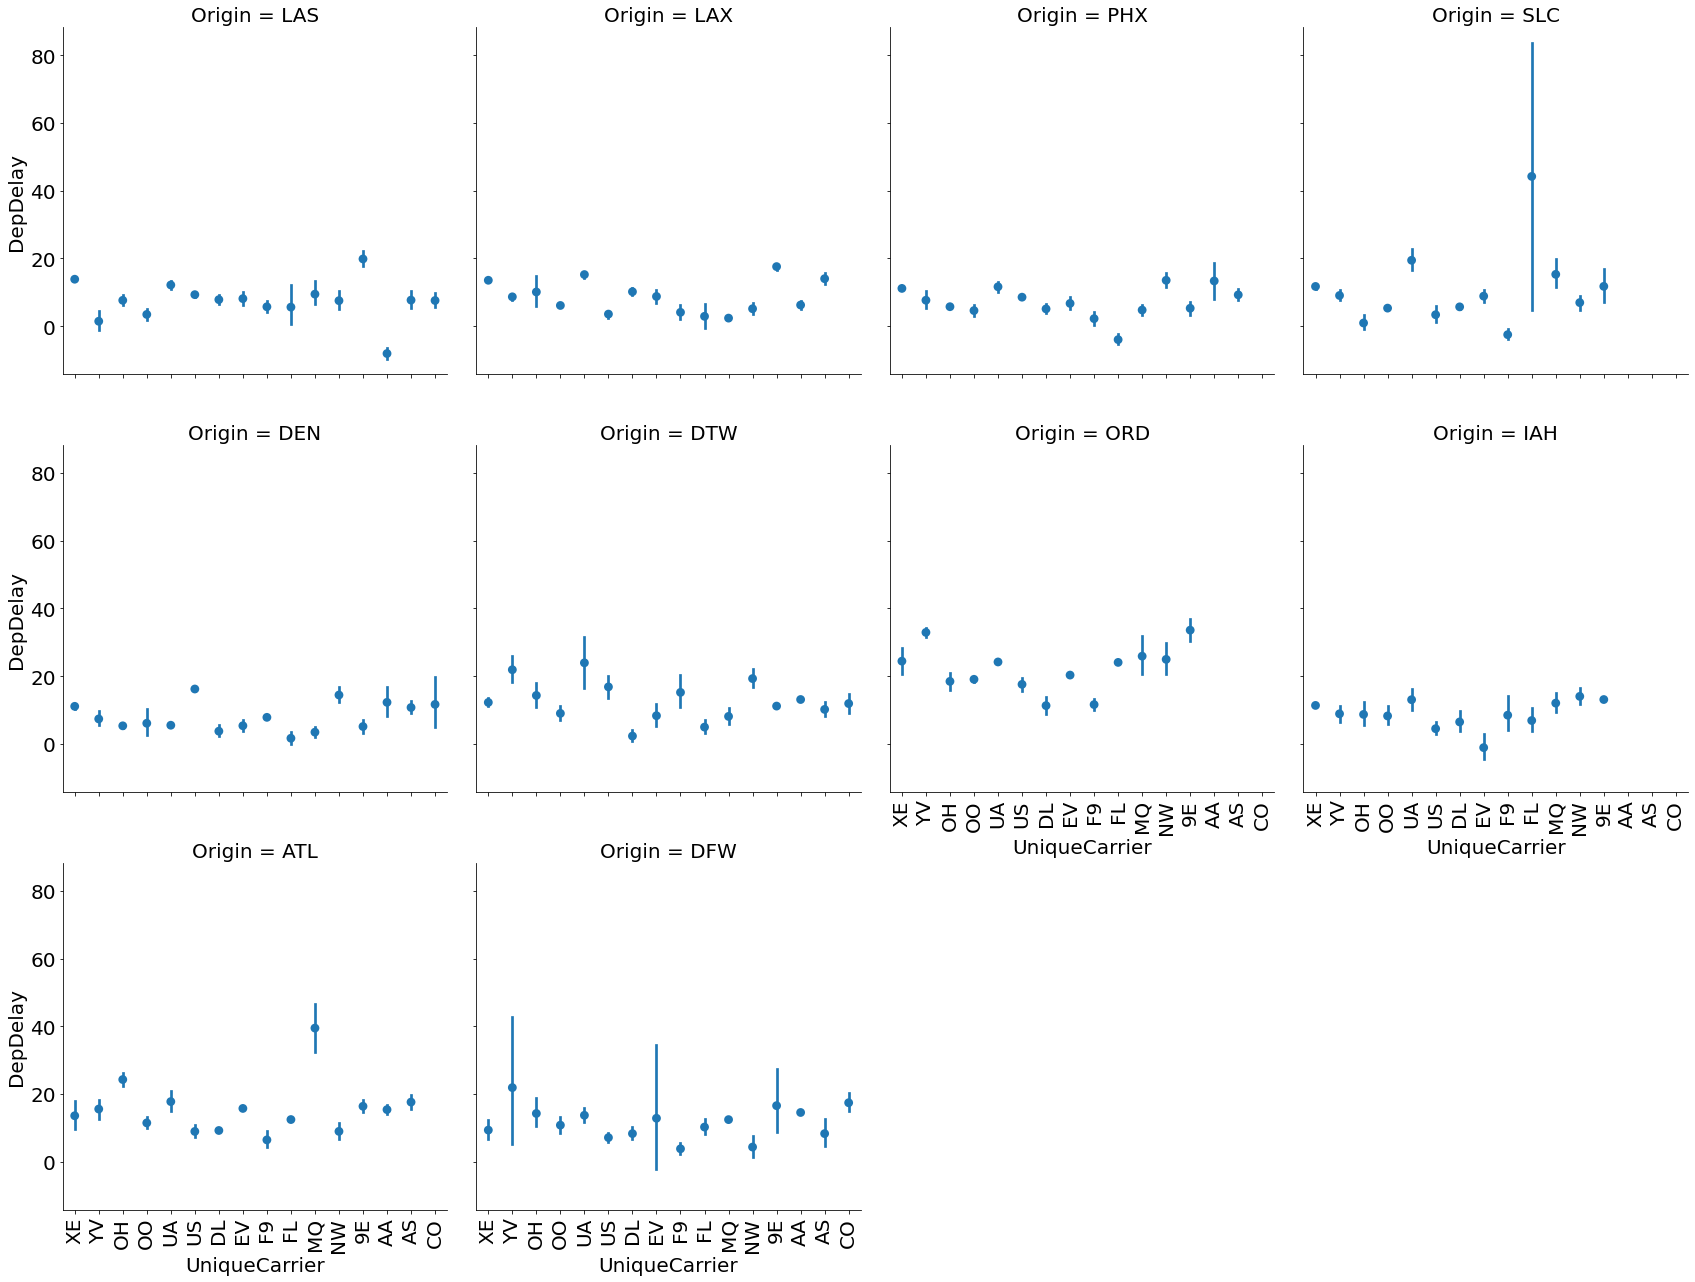

In [60]:
g = sb.FacetGrid(data=df_clean_origin, col='Origin', col_wrap=4, size=6)
g.map(sb.pointplot, 'UniqueCarrier', 'DepDelay', linestyles="")
g.set_xticklabels(rotation=90)

- selon l'origin les companies ont des retard grand ou petit

/home/ay/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ay/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


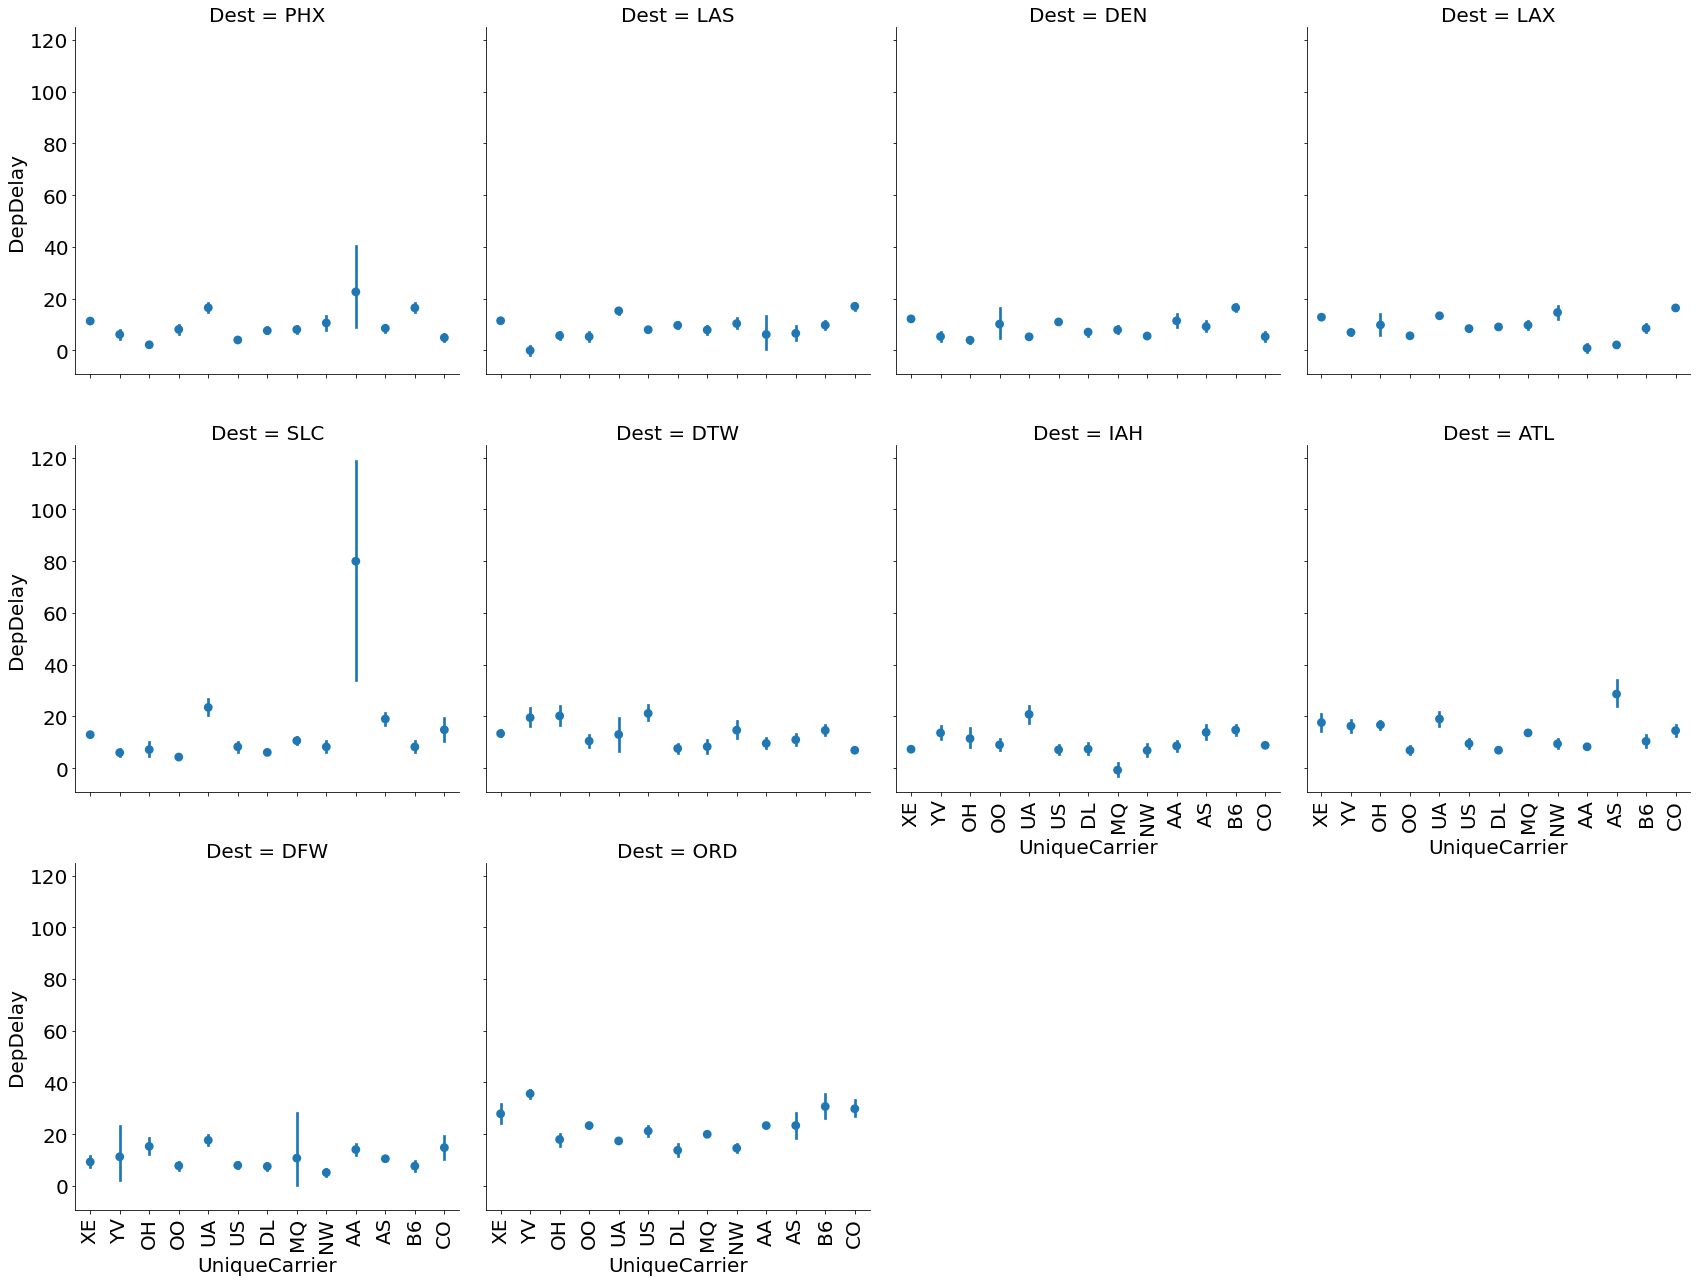

In [61]:
g = sb.FacetGrid(data=df_clean_dist, col='Dest', col_wrap=4, size=6)
g.map(sb.pointplot, 'UniqueCarrier', 'DepDelay', linestyles="")
g.set_xticklabels(rotation=90)


- selon destinataire, les companies ont des retard grand ou petit

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> quand il y une retard dans le depart donc on trouve le retard d'arrive en plus l'origine et destinataire on peut trouver des retards

### Were there any interesting or surprising interactions between features?

> Je n'ai pas pris que l'origine et le destinataire influencent le temps d'arrive et de depart pour les vols

## Conclusions
- Nous pouvons au final tirez les conclusions suivantes.
  - Les retards ont une petite corrélation avec l'aéroport, la compagnie aérienne et l'itinéraire. 
  - Les annulations sont principalement dues aux conditions météorologiques
  - Il n'y a aucune relation entre les retards et le temps écoulé ou l'heure de départ. 
  - Il y a une forte corrélation entre le retard de départ et d'arrivée
  - Il y a un très petit nombre de vols annulés
  - les compagies qui ont un nombre de vols plus grande ayant un temp de retard plus petit